In [ ]:
install.packages("devtools")
require(devtools)
install_github("burrm/lolcat")
require(lolcat)

install.packages("dplyr")
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Loading required package: devtools

Loading required package: usethis




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpf4k8Nv/remotes16670aaa656/burrm-lolcat-a42620f/DESCRIPTION’ ... OK
* preparing ‘lolcat’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘lolcat_2.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lolcat

lolcat 2.0.0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
ro<-round.object
nqtr<-function(x,d){noquote(t(round.object(x, d)))}
options(scipen=999)

# <table width=1400><td bgcolor="#ba2f2a"><font color="white" size="8"><b>
W4: Short and Long Term MSA
</b></font></td></table>

<table width=1400><td bgcolor="#d5695d"><font color="white" size="6"><b>
1. Short Term MSA
</b></font></td></table>


<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
1.1 Assumptions
</b><br><br>
&#10140; Measurement Errors are Independent<br>
&#10140; Measurement Errors are Normally Distributed<br>
&#10140; Measurement Error is Independnet of the True Value
</font></td></table>

In [ ]:
# Short Term MSA ----------------------------------------------------------
Short.Term.Study.Data <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/Short%20Term%20Study%20Data.txt")
st <- Short.Term.Study.Data
# Change Part and Operator to Factors -------------------------------------
st$Part <- factor(st$Part)
st$Operator <- factor(st$Operator, labels = c("Op 1", "Op 2", "Op 3"))
head(st)

,Part,Operator,Value
,<fct>,<fct>,<dbl>
1,1,Op 1,213.802
2,2,Op 1,217.996
3,3,Op 1,212.636
4,4,Op 1,190.491
5,5,Op 1,200.870
6,6,Op 1,213.868


In [ ]:
# Random Sequence Generator -----------------------------------------------
sample.int(n = 25)
# Summary - Measurement Error should be normally distributed
# for most parts --------
norm <- ro(summary.continuous(fx = Value~Part*Operator, data = st), 4)

filtered_norm <- norm[, c("Part", "Operator", "n", "missing", "mean", "var", "adtest.p", "swtest.p")]
filtered_norm <- filtered_norm[filtered_norm$adtest.p < 0.05 | filtered_norm$swtest.p < 0.05, ]
print(filtered_norm)

[1] 21  8  3  6 12  9 20 19 25  5  2 23 16 22 15 18 17 14  7  1 24  4 13 11 10

   Part Operator n missing     mean    var adtest.p swtest.p
17    6     Op 2 5       0 198.1542 1.5095   0.0347   0.0408
21    7     Op 3 5       0 210.1918 0.5987   0.0304   0.0220
35   12     Op 2 5       0 220.5398 0.9353   0.0260   0.0187
40   14     Op 1 5       0 211.5494 2.1165   0.0490   0.0417
72   24     Op 3 5       0 208.8744 1.9072   0.0313   0.0328


In [ ]:
# Xbar and R Chart --------------------------------------------------------
# Split Data by Operator
Op1<-st[which(st$Operator=="Op 1"),]
Op1<-Op1[order(Op1$Part),]

Op2<-st[which(st$Operator=="Op 2"),]
Op2<-Op2[order(Op2$Part),]

Op3<-st[which(st$Operator=="Op 3"),]
Op3<-Op3[order(Op3$Part),]

In [ ]:
# Extract data
op1.chart<-spc.chart.variables.mean.and.meanrange(data = Op1$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)


op2.chart<-spc.chart.variables.mean.and.meanrange(data = Op2$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)

op3.chart<-spc.chart.variables.mean.and.meanrange(data = Op3$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)

In [ ]:
# Combine means and ranges
means<-c(op1.chart$parameter.means
         , op2.chart$parameter.means
         , op3.chart$parameter.means)

ranges<-c(op1.chart$parameter.ranges
          , op2.chart$parameter.ranges
          , op3.chart$parameter.ranges)

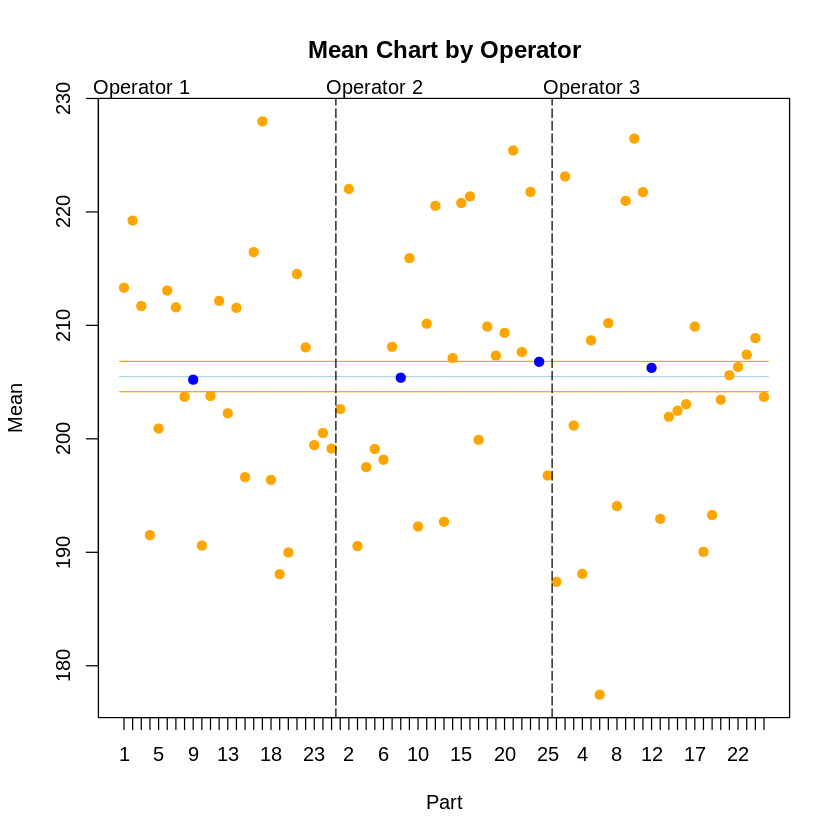

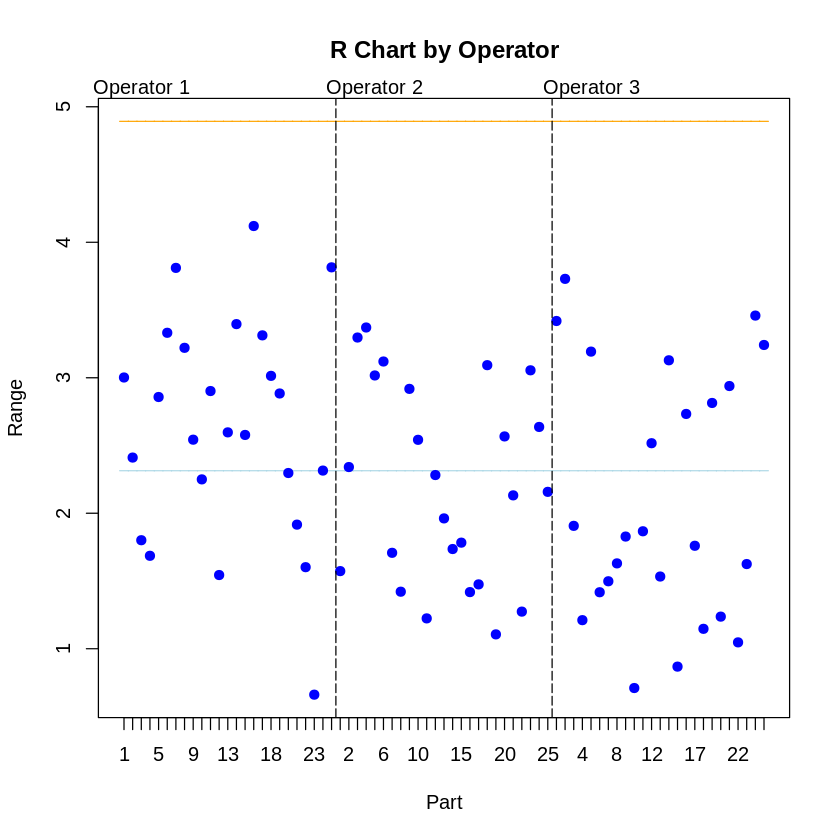

In [ ]:
# Create combined chart
spc.cc<-spc.chart.variables.mean.and.meanrange.simple(
  means = means,
  ranges = ranges,
  sample.size = 5,
  combine.charts = "separate",
  x = c(1:25, 1:25, 1:25),
  chart1.main = "Mean Chart by Operator",
  chart1.xlab = "Part",
  chart2.main = "R Chart by Operator",
  chart2.xlab = "Part",
  chart1.line.col = "white",
  chart2.line.col = "white",
  chart1.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)
    mtext("Operator 3", side = 3
          , at = 55) },
  chart2.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)
    mtext("Operator 3", side = 3
          , at = 55) })

In [ ]:
# Part Size Mean vs Variation (within each Operator) ----------------------
# Operator 1 --------------------------------------------------------------
op1.mean <- aggregate(
  x = Op1$Value,
  by = list(Op1$Part),
  FUN = mean)
op1.sd <- aggregate(
  x = Op1$Value,
  by = list(Op1$Part),
  FUN = sd)

op1.data <- cbind(op1.mean$x, op1.sd$x)
op1.data <- as.data.frame(op1.data)
names(op1.data) <- c("Mean", "Std_Dev")
head(op1.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,213.3224,1.3340850
2,219.2372,0.9927979
3,211.7068,0.8565014
4,191.5146,0.6277693
5,200.9104,1.0595040
6,213.0702,1.3586575


In [ ]:
# Pearson Product Moment Correlation Coefficient
(r.op1 <- round(cor(x = op1.data$Mean
                    , y = op1.data$Std_Dev), 3))

[1] 0.278

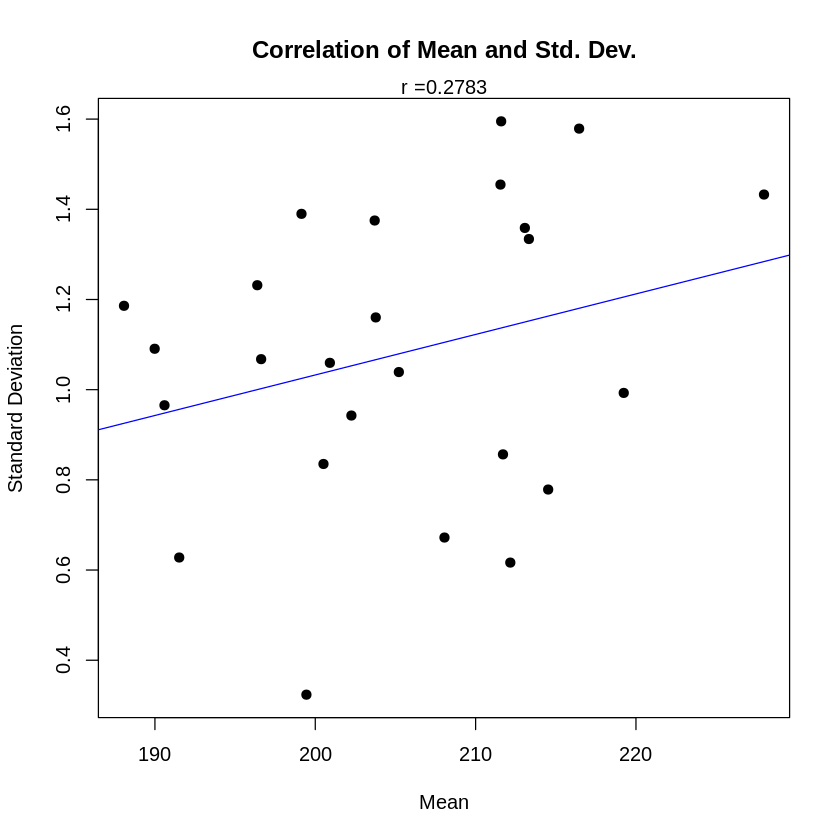

In [ ]:
# Scatterplot of Mean vs Standard deviation
plot(
  x = op1.data$Mean,
  y = op1.data$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev.")
abline(lm(Std_Dev ~ Mean, data = op1.data), col = "blue")
mtext(bquote(paste("r =", .(r.op1), side = 3)))

In [ ]:
# Test to see if r is different from zero
cor.pearson.r.onesample(x = op1.data$Mean
                       ,y = op1.data$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = 1.3884, null hypothesis correlation = 0, p-value = 0.1783
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1314953  0.6065699
sample estimates:
   sample.r          df sample.size   r.squared z_r.lowerci         z_r 
 0.27808927 23.00000000 25.00000000  0.07733364 -0.13225573  0.28560999 
z_r.upperci       power 
 0.70347572  0.26751884 


In [ ]:
# Operator 2 --------------------------------------------------------------
op2.mean <- aggregate(
  x = Op2$Value,
  by = list(Op2$Part),
  FUN = mean)
op2.sd <- aggregate(
  x = Op2$Value,
  by = list(Op2$Part),
  FUN = sd)

op2.data <- cbind(op2.mean$x, op2.sd$x)
op2.data <- as.data.frame(op2.data)
names(op2.data) <- c("Mean", "Std_Dev")
head(op2.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,202.6212,0.7397018
2,222.0244,0.9222509
3,190.5492,1.3098087
4,197.5032,1.2289169
5,199.1044,1.1574745
6,198.1542,1.2286143


In [ ]:
# Pearson Product Moment Correlation Coefficient
(r.op2<-round(cor(x = op2.data$Mean
                 ,y = op2.data$Std_Dev),3))

[1] -0.203

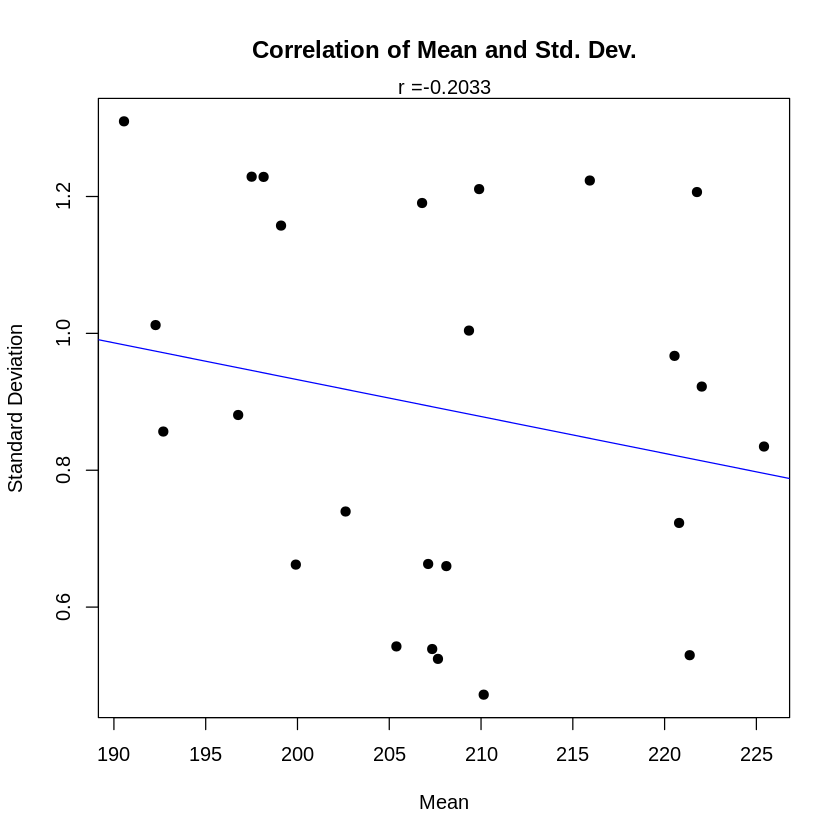

In [ ]:
# Scatterplot of Mean vs Standard deviation
plot(
  x = op2.data$Mean,
  y = op2.data$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev.")
abline(lm(Std_Dev ~ Mean, data = op2.data), col = "blue")
mtext(bquote(paste("r =", .(r.op2), side = 3)))

In [ ]:
# See if r is significantly different than zero
cor.pearson.r.onesample(x = op2.data$Mean
                       ,y = op2.data$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = -0.9921, null hypothesis correlation = 0, p-value =
0.3315
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5534293  0.2093042
sample estimates:
   sample.r          df sample.size   r.squared z_r.lowerci         z_r 
-0.20257816 23.00000000 25.00000000  0.04103791 -0.62328532 -0.20541959 
z_r.upperci       power 
 0.21244613  0.15951318 


In [ ]:
# Operator 3
op3.mean <- aggregate(
  x = Op3$Value,
  by = list(Op3$Part),
  FUN = mean)
op3.sd <- aggregate(
  x = Op3$Value,
  by = list(Op3$Part),
  FUN = sd)

op3.data <- cbind(op3.mean$x, op3.sd$x)
op3.data <- as.data.frame(op3.data)
names(op3.data) <- c("Mean", "Std_Dev")
head(op3.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,187.3950,1.4924152
2,223.1208,1.4405928
3,201.1760,0.8245978
4,188.1000,0.4591302
5,208.6820,1.1528940
6,177.4516,0.5667956


In [ ]:
# Pearson Product Moment Correlation Coefficient
(r.op3<-round(cor(x = op3.data$Mean
                 ,y = op3.data$Std_Dev),3))

[1] 0.049

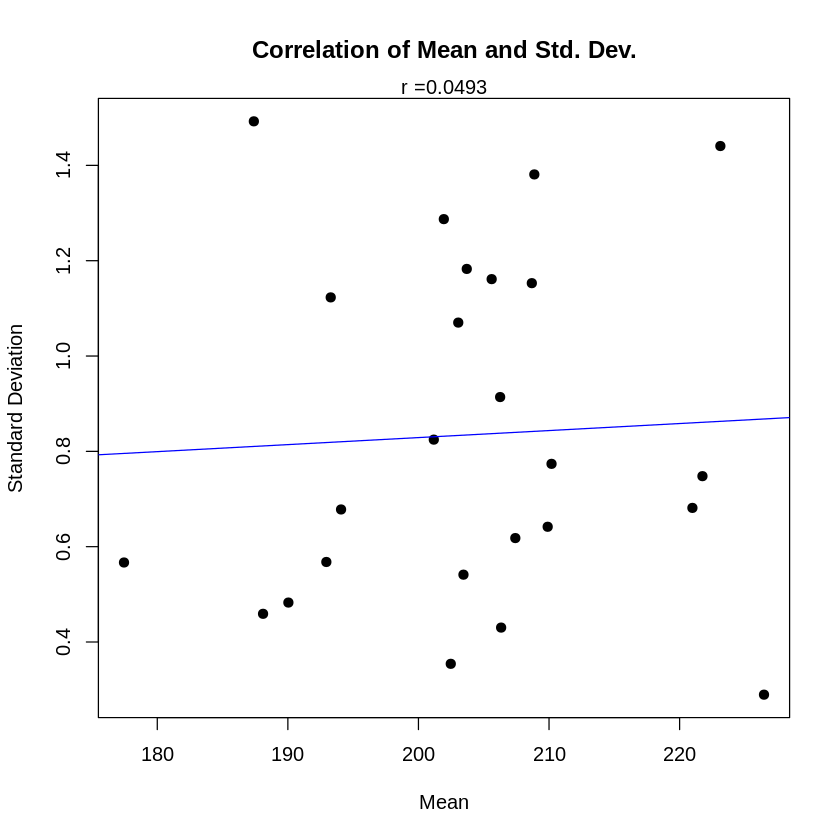

In [ ]:
# Scatterplot of Mean vs Standard deviation
plot(
  x = op3.data$Mean,
  y = op3.data$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev.")
abline(lm(Std_Dev ~ Mean, data = op3.data), col = "blue")
mtext(bquote(paste("r =", .(r.op3), side = 3)))

In [ ]:
# See if r is significantly different than zero
cor.pearson.r.onesample(x = op3.data$Mean
                       ,y = op3.data$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = 0.23403, null hypothesis correlation = 0, p-value = 0.817
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3531881  0.4355030
sample estimates:
    sample.r           df  sample.size    r.squared  z_r.lowerci          z_r 
 0.048740083 23.000000000 25.000000000  0.002375596 -0.369086992  0.048778733 
 z_r.upperci        power 
 0.466644459  0.041710595 


In [ ]:
# Short Term MSA ANOVA ----------------------------------------------------
st.out <-ro(
    msa.continuous.repeatability.reproducibility(
      measurement = st$Value,
      part        = st$Part,
      appraiser   = st$Operator,
      stat.lsl    = 180,
      stat.usl    = 220),5)

(anova.st.out <- data.frame(st.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,24,19215.5231,800.64680,1.68931,0.06088
appraiser,2,920.1117,460.05587,0.97069,0.38613
part:appraiser,48,22749.5681,473.94933,481.47436,0.00000
Repeatability,300,295.3113,0.98437,NA,NA
Total,374,43180.5142,NA,NA,NA


In [ ]:
# Components of Variance --------------------------------------------------
(comp.st.var <- data.frame(st.out$ev.full))
comp.var.st.out <- comp.st.var[1:2]
# Add rownames to Variance Component Table
comp.var.st.out$Source <- rownames(comp.var.st.out)
comp.var.st.out <- comp.var.st.out[c(3,1,2)]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,95.57736,81.44,9.77637,58.65821,90.24,146.65
Repeatability,0.98437,0.84,0.99215,5.95293,9.16,14.88
Reproducibility,94.59299,80.60,9.72589,58.35536,89.78,145.89
Appraiser,0.00000,0.00,0.00000,0.00000,0.00,0.00
Part:Appraiser,94.59299,80.60,9.72589,58.35536,89.78,145.89
Part-To-Part,21.77983,18.56,4.66689,28.00132,43.08,70.00
Total Variation,117.35719,100.00,10.83315,64.99892,100.00,162.50


In [ ]:
# Study Variation ---------------------------------------------------------
(study.st.var <- data.frame(st.out$ev.full))
study.var.st.out <- study.st.var[3:6]
# Add rownames to Study Variation Table
study.var.st.out$Source<-rownames(study.var.st.out)
study.var.st.out<-study.var.st.out[c(5,1,2,3,4)]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,95.57736,81.44,9.77637,58.65821,90.24,146.65
Repeatability,0.98437,0.84,0.99215,5.95293,9.16,14.88
Reproducibility,94.59299,80.60,9.72589,58.35536,89.78,145.89
Appraiser,0.00000,0.00,0.00000,0.00000,0.00,0.00
Part:Appraiser,94.59299,80.60,9.72589,58.35536,89.78,145.89
Part-To-Part,21.77983,18.56,4.66689,28.00132,43.08,70.00
Total Variation,117.35719,100.00,10.83315,64.99892,100.00,162.50


In [ ]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
st.out$ev.reduced.number.distinct.categories

[1] 1

In [ ]:
# Discrimination Ratio
st.out$ev.reduced.discrimination.ratio

[1] 1.20655

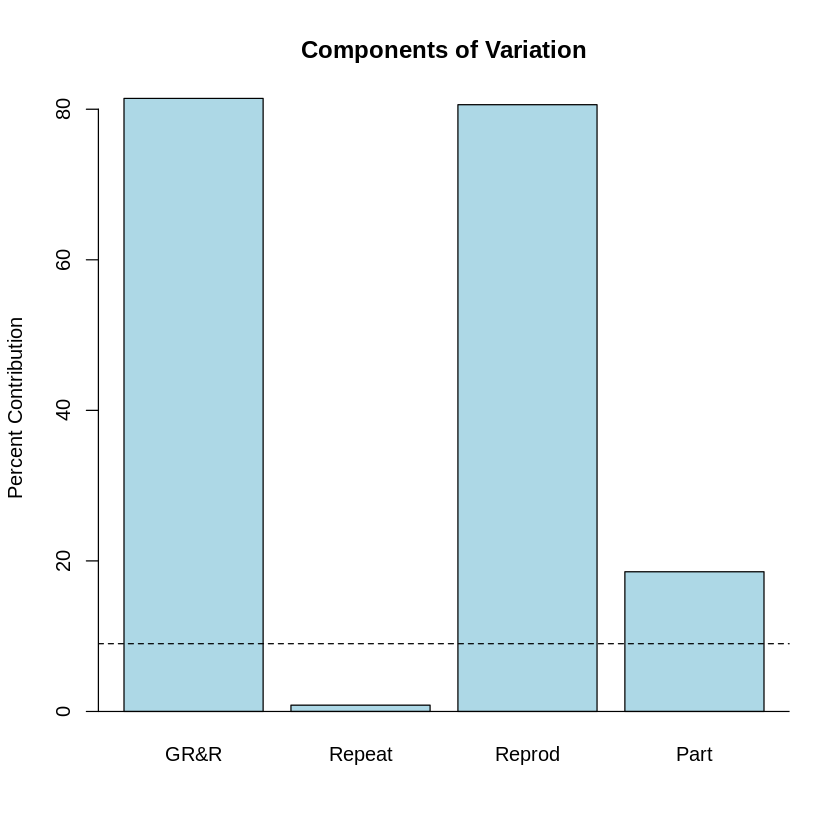

In [ ]:
# Data Visualization ------------------------------------------------------
# Barplot - Components of Variance ----------------------------------------

# Subset data for barplot
bp.compvar<-comp.var.st.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")

abline(h=0)
abline(h=9, lty=2)

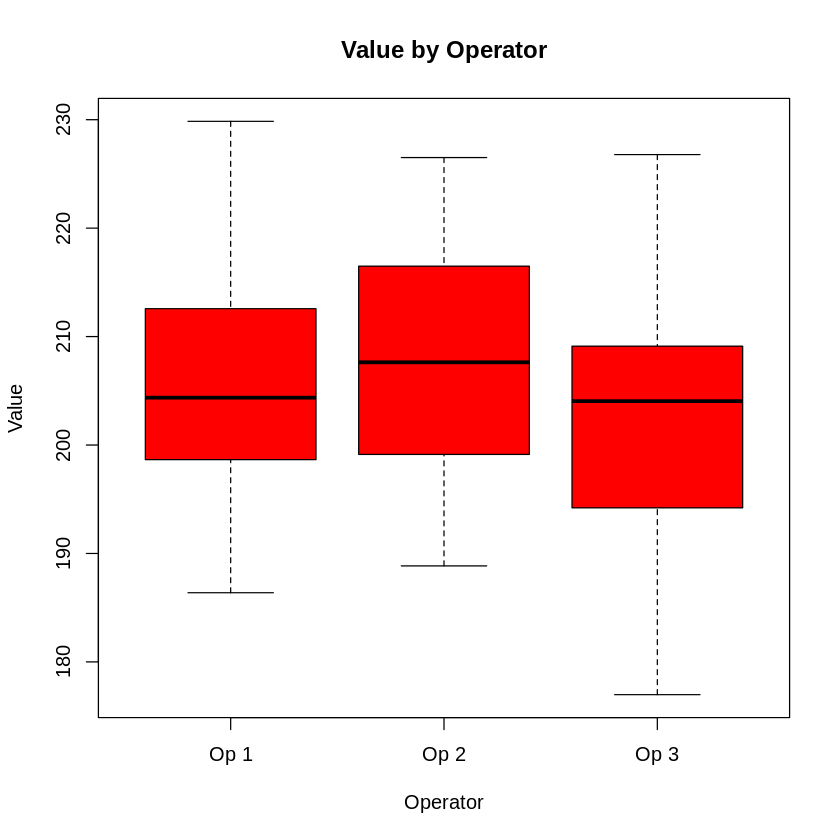

In [ ]:
# Boxplot - Value by Operator ---------------------------------------------
boxplot(Value ~ Operator,
        data = st,
        col = "red",
        main = "Value by Operator")

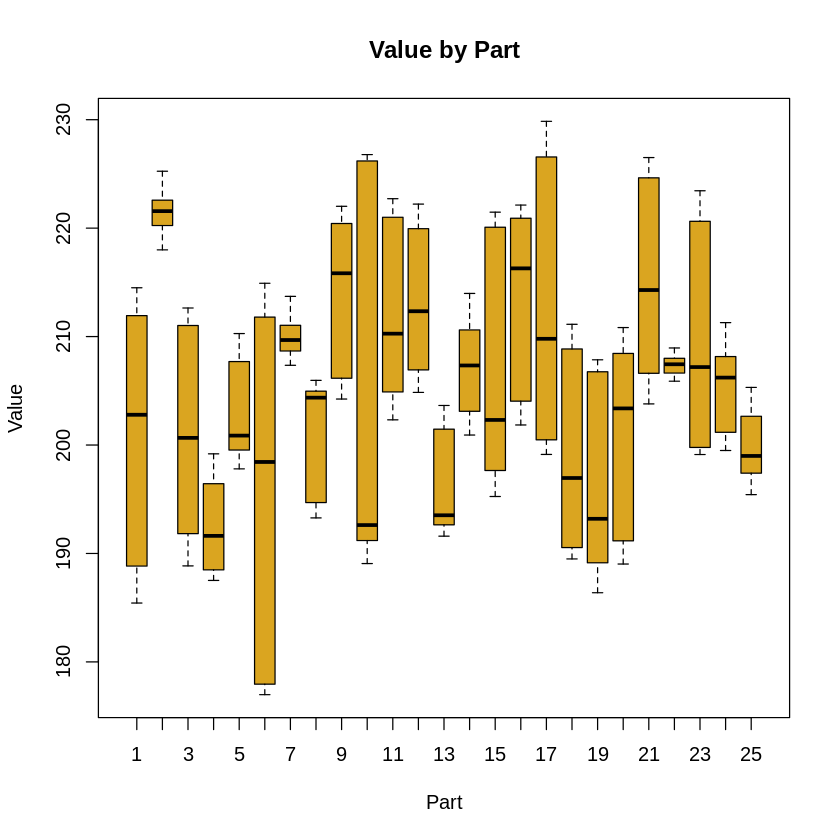

In [ ]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = st,
        col = "goldenrod",
        main = "Value by Part")

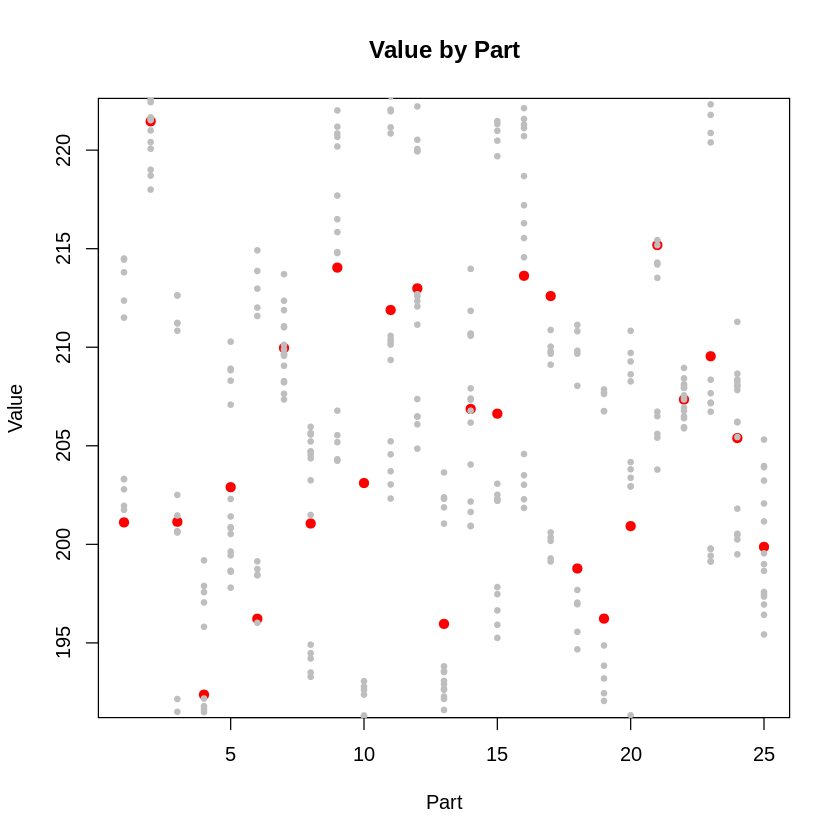

In [ ]:
# Line / Point Chart - Value by Part --------------------------------------
lc <-aggregate(st$Value
               ,by = list(as.numeric(st$Part))
               ,FUN = mean)

plot(
  x = lc$x,
  type = "p",
  pch = 19,
  col = "red",
  main = "Value by Part",
  xlab = "Part",
  ylab = "Value"
)
points(
  x   = st$Part,
  y   = st$Value,
  pch = 19,
  col = " grey",
  cex = 0.6,
  bty = "n"
)

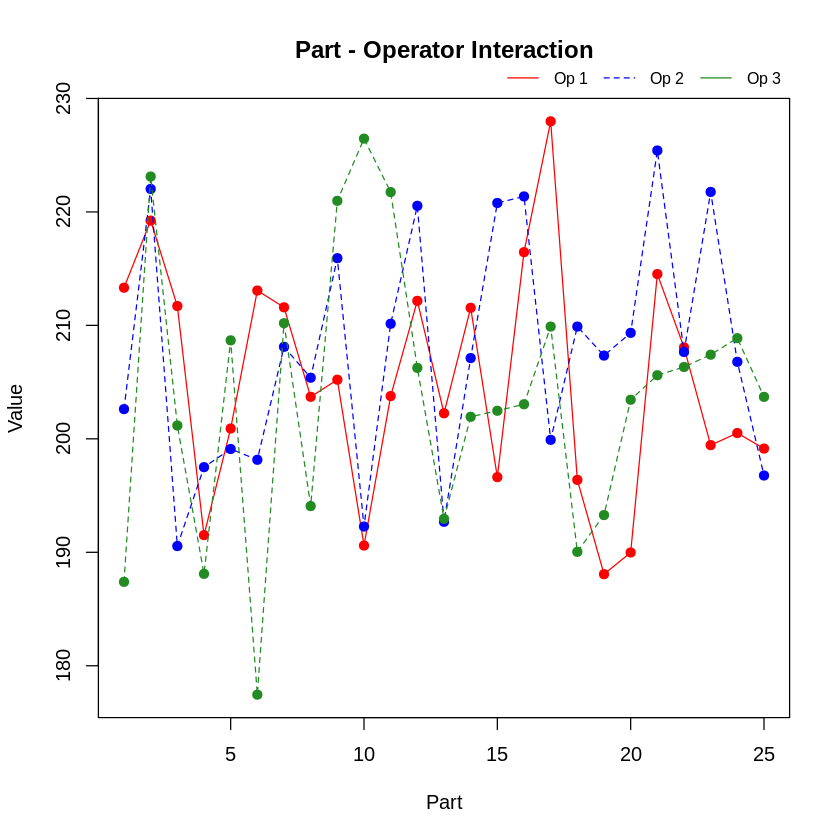

In [ ]:
# Part Operator Interaction -----------------------------------------------
plot(op1.chart$parameter.means,
     type = "o",
     pch = 19,
     col = "red",
     xlab = "Part",
     ylab = "Value"  ,
     main = "Part - Operator Interaction",
     ylim = c(min(op1.chart$parameter.means, op2.chart$parameter.means,op3.chart$parameter.means),
              max(op1.chart$parameter.means, op2.chart$parameter.means,op3.chart$parameter.means)))
lines(
  op2.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "blue",
  lty = 2)
lines(
  op3.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "forest green",
  lty = 2)
legend("bottomright",inset = c(0, 1),
       xpd = TRUE,
       legend = c("Op 1", "Op 2","Op 3"),
       col = c("red", "blue","forest green"),
       horiz = T,
       lty = 1:2,
       cex = 0.8,
       bty = "n")

<table width=1400><td bgcolor="#d5695d"><font color="white" size="6"><b>
2. Long Term MSA
</b></font></td></table>

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.1 Long Term MSA
</b>

</font></td></table>

In [ ]:
# Long Term MSA -----------------------------------------------------------
Longterm.MSA <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/Longterm%20MSA.txt")
lt <- Longterm.MSA
# Change Part and Operator to Factors -------------------------------------
lt$Part <- factor(lt$Part)
lt$Operator <- rep(1, each=200)
lt$Operator <- factor(lt$Operator, labels = "Operator 1")
head(lt)

,Rep,Part,Value,Operator
,<int>,<fct>,<dbl>,<fct>
1,1,1,1.375,Operator 1
2,2,1,1.366,Operator 1
3,3,1,1.454,Operator 1
4,4,1,1.461,Operator 1
5,5,1,1.533,Operator 1
6,6,1,1.404,Operator 1


In [ ]:
# Summary - Measurement Error should be normally distributed
# for most parts --------
norm <- ro(summary.continuous(fx = Value ~ Part, data = lt), 4)
norm

,Part,n,missing,mean,var,g3.skewness,g3test.p,g4.kurtosis,g4test.p
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,25,0,1.4290,0.0028,-0.1338,0.7594,-0.6815,0.4296
2,2,25,0,1.4172,0.0028,-0.3869,0.3823,-0.5819,0.5425
3,3,25,0,1.4242,0.0025,0.5869,0.1932,-0.1471,0.9612
4,4,25,0,1.4120,0.0016,-0.5823,0.1965,1.4342,0.1358
5,5,25,0,1.4109,0.0029,0.2609,0.5526,-0.0180,0.8320
6,6,25,0,1.4131,0.0044,0.6009,0.1835,0.5585,0.4123
7,7,25,0,1.3996,0.0018,-0.4941,0.2689,0.5883,0.3971
8,8,25,0,1.4026,0.0025,0.3412,0.4396,-0.8495,0.2590


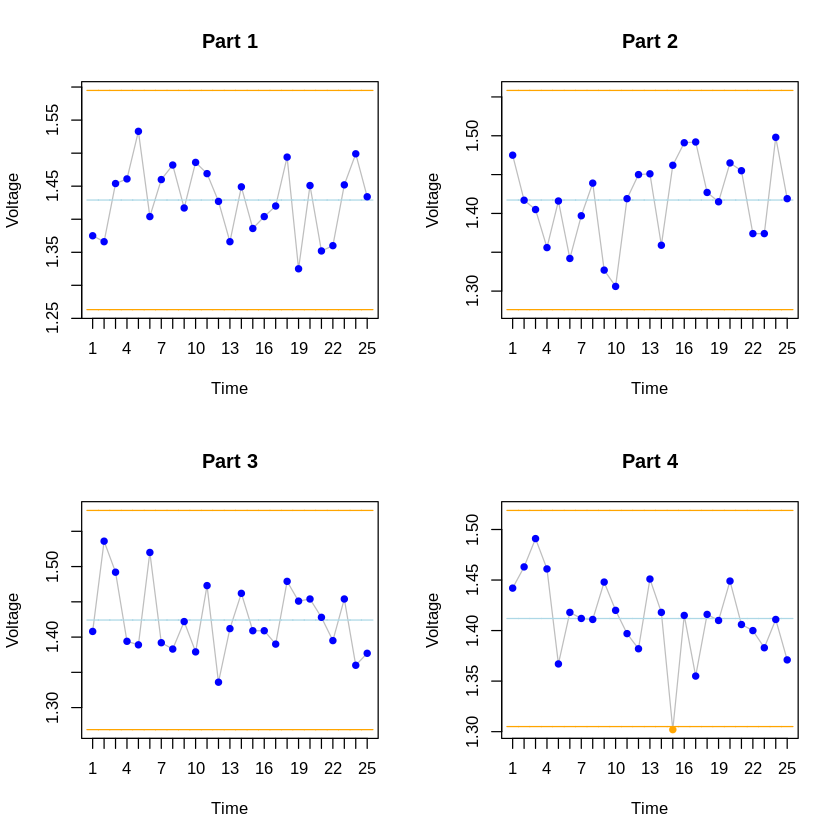

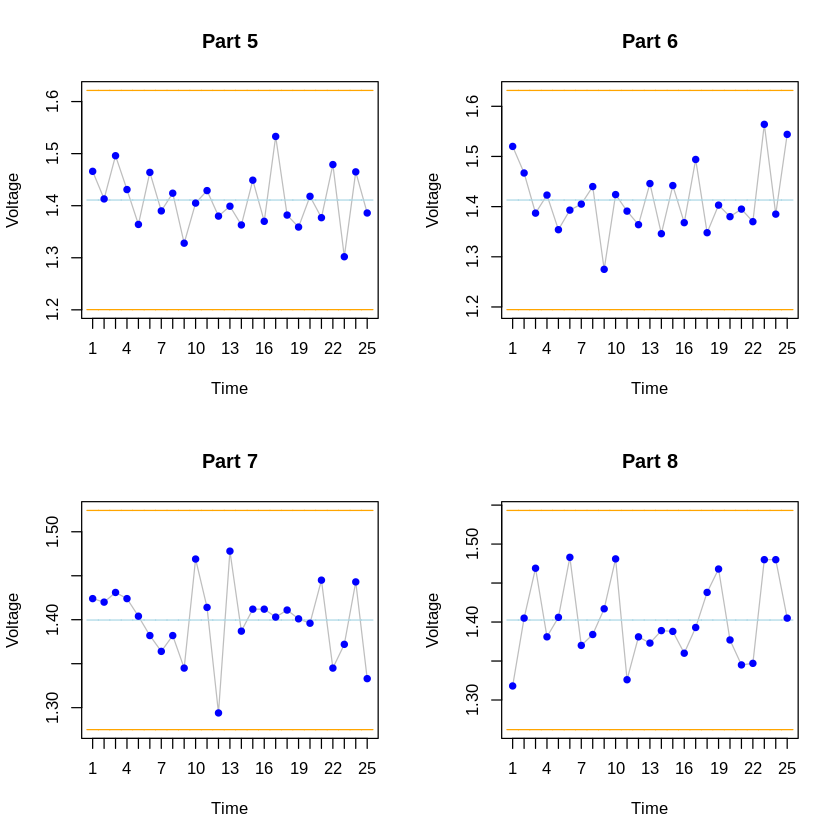

In [ ]:
# Control Charts by Part --------------------------------------------------
rules<-spc.rulesets.nelson.1984.test.1.2.3.4()
rules$alternating<-NULL

par(mfrow=c(2,2))

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 1],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 1",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 2],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 2",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 3],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 3",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 4],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 4",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 5],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 5",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 6],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 6",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 7],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 7",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = lt$Value[lt$Part == 8],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 8",
  chart2.display = F)

graphics.off()

In [ ]:
# Calculate Mean and Standard Deviations by Repetition ----------------------------------
lt.mean <- aggregate(lt$Value, by = list(lt$Rep), FUN=mean)
lt.sd <- aggregate(lt$Value, by = list(lt$Rep), FUN=sd)
# Create Data Frame
lt.data <- cbind(lt.mean$x, lt.sd$x)
lt.data <- as.data.frame(lt.data)
names(lt.data) <- c("Mean", "Std_Dev")
head(lt.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,1.428500,0.06283311
2,1.435875,0.05168155
3,1.453125,0.04177298
4,1.416375,0.03721727
5,1.404125,0.05667309
6,1.425750,0.05874582


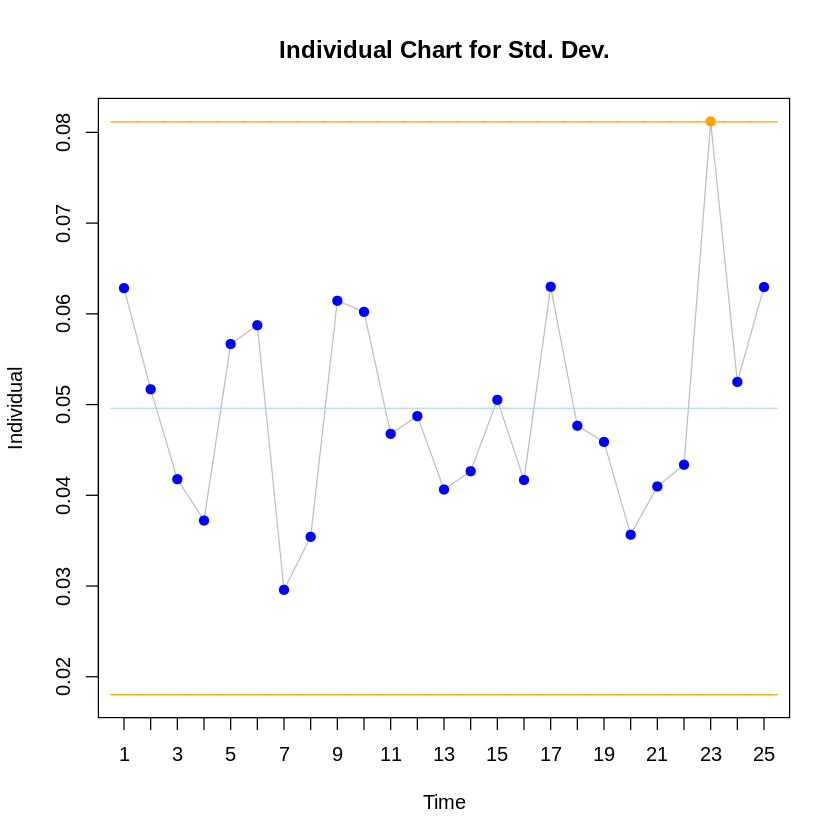

In [ ]:
# Individuals Chart for Standard Deviation --------------------------------
spc.chart.variables.individual.and.movingrange.normal.simple(
  individuals = lt.data$Std_Dev,
  chart2.display = F,
  chart1.main = "Individual Chart for Std. Dev.")

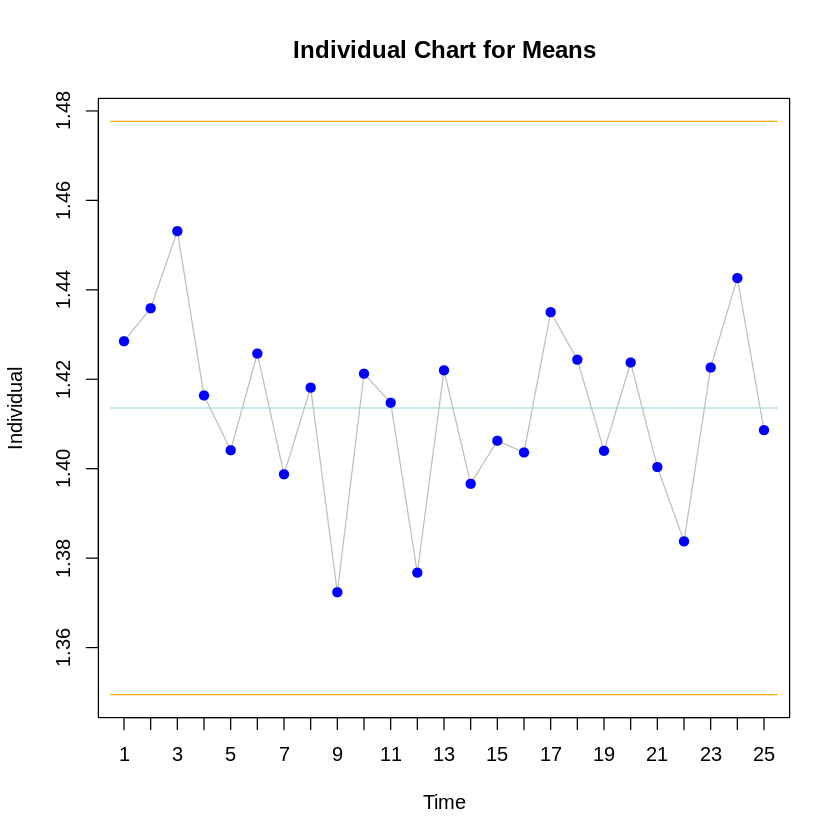

In [ ]:
# Individuals Chart for Means ---------------------------------------------
spc.chart.variables.individual.and.movingrange.normal.simple(
  individuals = lt.data$Mean,
  chart2.display =  F,
  chart1.main = "Individual Chart for Means")

In [ ]:
# Part Size Mean vs Variation ----------------------
lt.part.mean <-aggregate(
     x = lt$Value,
     by = list(lt$Part),
     FUN = mean)
lt.part.sd <- aggregate(
  x = lt$Value,
  by = list(lt$Part),
  FUN = sd)
lt.data.part <- cbind(lt.part.mean$x, lt.part.sd$x)
lt.data.part <- as.data.frame(lt.data.part)
names(lt.data.part) <- c("Mean", "Std_Dev")
head(lt.data.part)

,Mean,Std_Dev
,<dbl>,<dbl>
1,1.42904,0.05296814
2,1.41724,0.05284118
3,1.42416,0.04981355
4,1.41196,0.03963214
5,1.41088,0.05390758
6,1.41312,0.06620758


In [ ]:
# Pearson Product Moment Correlation Coefficient --------------------------
(r.lt <- ro(cor(x = lt.data.part$Mean
              , y = lt.data.part$Std_Dev), 3))

[1] 0.287

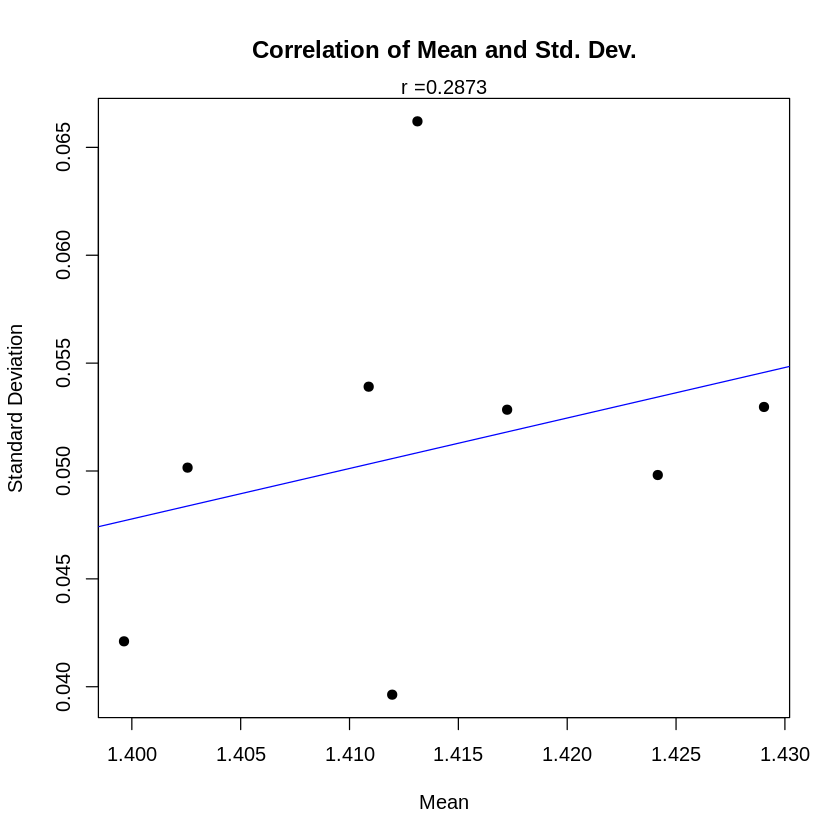

In [ ]:
# Scatterplot of Mean vs Standard Deviation of Parts ----------------------
#graphics.off()
plot(
  x = lt.data.part$Mean,
  y = lt.data.part$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev."
)
abline(lm(Std_Dev ~ Mean, data = lt.data.part), col = "blue")
mtext(bquote(paste("r =", .(r.lt), side = 3)))

In [ ]:
# See if r is significantly different than zero
cor.pearson.r.onesample(x = lt.data.part$Mean
                      , y = lt.data.part$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = 0.73495, null hypothesis correlation = 0, p-value =
0.4901
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5232623  0.8249986
sample estimates:
   sample.r          df sample.size   r.squared z_r.lowerci         z_r 
 0.28738421  6.00000000  8.00000000  0.08258969 -0.58080989  0.29571265 
z_r.upperci       power 
 1.17223519  0.09701823 


In [ ]:
# Long Term MSA ANOVA ----------------------------------------------------
lt.out <-
  ro(msa.continuous.repeatability.reproducibility(
      measurement = lt$Value,
      part = lt$Part,
      appraiser = lt$Operator,
      stat.lsl = 1.3116,
      stat.usl = 1.5084),5)

(anova.lt.out<-data.frame(lt.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,7,0.01726,0.00247,0.92902,0.48516
Repeatability,192,0.50947,0.00265,NA,NA
3,199,0.52672,NA,NA,NA


In [ ]:
# Components of Variance --------------------------------------------------
# Study Variation ---------------------------------------------------------
(comp.lt.var<-data.frame(lt.out$ev.full))
comp.var.lt.out <- comp.lt.var[1:2]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.00265,100,0.05151,0.30907,100,157.05
Repeatability,0.00265,100,0.05151,0.30907,100,157.05
Reproducibility,NA,NA,NA,NA,NA,NA
Appraiser,NA,NA,NA,NA,NA,NA
Part:Appraiser,NA,NA,NA,NA,NA,NA
Part-To-Part,0.00000,0,0.00000,0.00000,0,0.00
Total Variation,0.00265,100,0.05151,0.30907,100,157.05


In [ ]:
# Study Variation ---------------------------------------------------------
(study.lt.var<-data.frame(lt.out$ev.full))
study.var.lt.out<-study.lt.var[3:6]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.00265,100,0.05151,0.30907,100,157.05
Repeatability,0.00265,100,0.05151,0.30907,100,157.05
Reproducibility,NA,NA,NA,NA,NA,NA
Appraiser,NA,NA,NA,NA,NA,NA
Part:Appraiser,NA,NA,NA,NA,NA,NA
Part-To-Part,0.00000,0,0.00000,0.00000,0,0.00
Total Variation,0.00265,100,0.05151,0.30907,100,157.05


In [ ]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
lt.out$ev.reduced.number.distinct.categories

# Discrimination Ratio
lt.out$ev.reduced.discrimination.ratio


[1] 1

[1] 1

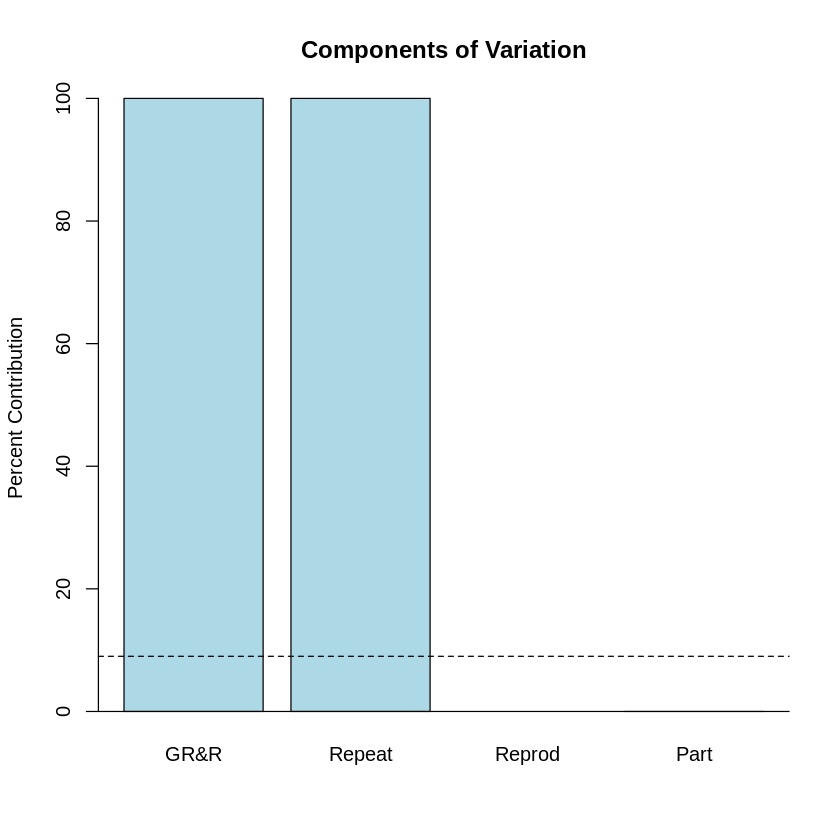

In [ ]:
# Data Visualization ------------------------------------------------------
# Barplot - Components of Variance ----------------------------------------

# Subset data for barplot
bp.compvar<-comp.var.lt.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")

abline(h=0)
abline(h=9, lty=2)

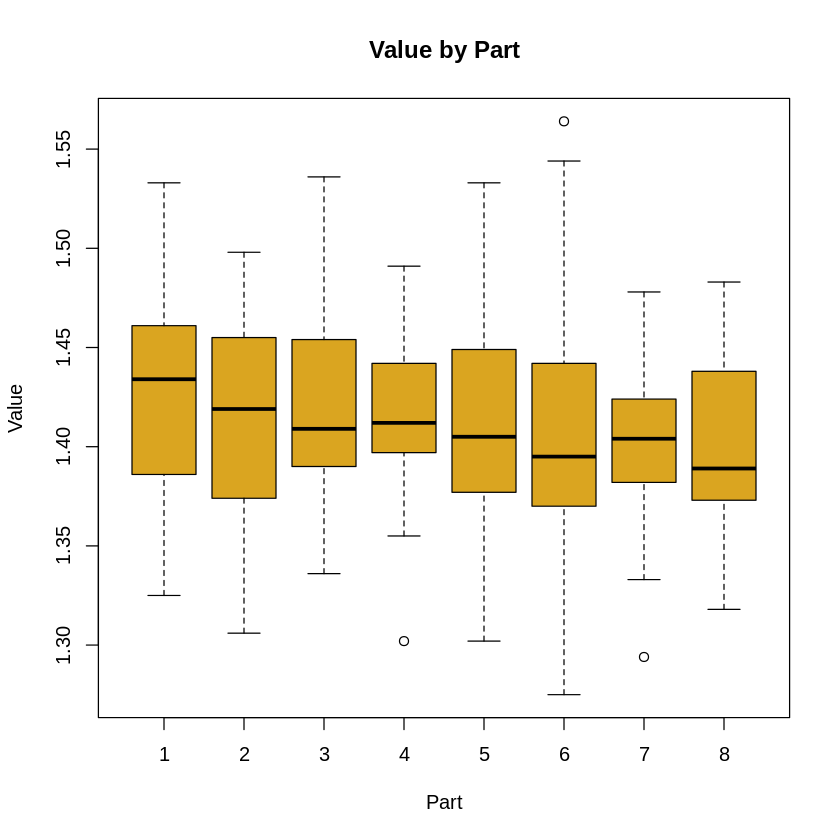

In [ ]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = lt,
        col = "goldenrod",
        main = "Value by Part")

<table width=1400><td bgcolor="#d5695d"><font color="white" size="6"><b>
Quiz Part1
</b></font></td></table>

Import Data

In [ ]:
# Short Term MSA ----------------------------------------------------------
short <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/Continuous%20ST%20R.dat")
short <- short[, -3]
# Change Part and Operator to Factors -------------------------------------
short$Part <- factor(short$Part)
short$Operator <- factor(short$Operator, labels = c("Op 1", "Op 2"))
head(short)

,Part,Operator,Value
,<fct>,<fct>,<dbl>
1,1,Op 1,24.161
2,2,Op 1,24.104
3,3,Op 1,29.017
4,4,Op 1,28.223
5,5,Op 1,29.134
6,6,Op 1,29.136


Q1: How Many Failed Normality Test

In [ ]:
# Random Sequence Generator -----------------------------------------------
sample.int(n = 25)
# Summary - Measurement Error should be normally distributed
# for most parts --------
norm <- ro(summary.continuous(fx = Value~Part*Operator, data = short), 4)
filtered_norm <- norm[, c("Part", "Operator", "n", "missing", "mean", "var", "adtest.p", "swtest.p")]
filtered_norm <- filtered_norm[filtered_norm$adtest.p < 0.05 | filtered_norm$swtest.p < 0.05, ]
print(filtered_norm)

[1] 11 10  3  9 25 23  4 13  6  1 18 20 12 16 22 24  7 15 17 19 21  5  2  8 14

   Part Operator n missing    mean    var adtest.p swtest.p
27   14     Op 1 5       0 24.0856 0.0023   0.0374   0.0317
32   16     Op 2 5       0 20.7628 0.0065   0.0159   0.0129


In [ ]:
# Xbar and R Chart --------------------------------------------------------
# Split Data by Operator
Op1<-short[which(short$Operator=="Op 1"),]
Op1<-Op1[order(Op1$Part),]

Op2<-short[which(short$Operator=="Op 2"),]
Op2<-Op2[order(Op2$Part),]

In [ ]:
# Extract data
op1.chart<-spc.chart.variables.mean.and.meanrange(data = Op1$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)

op2.chart<-spc.chart.variables.mean.and.meanrange(data = Op2$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)


In [ ]:
# Combine means and ranges
means<-c(op1.chart$parameter.means
         , op2.chart$parameter.means)

ranges<-c(op1.chart$parameter.ranges
          , op2.chart$parameter.ranges)

Q2: Not Control: <br>
Q3: Part 7

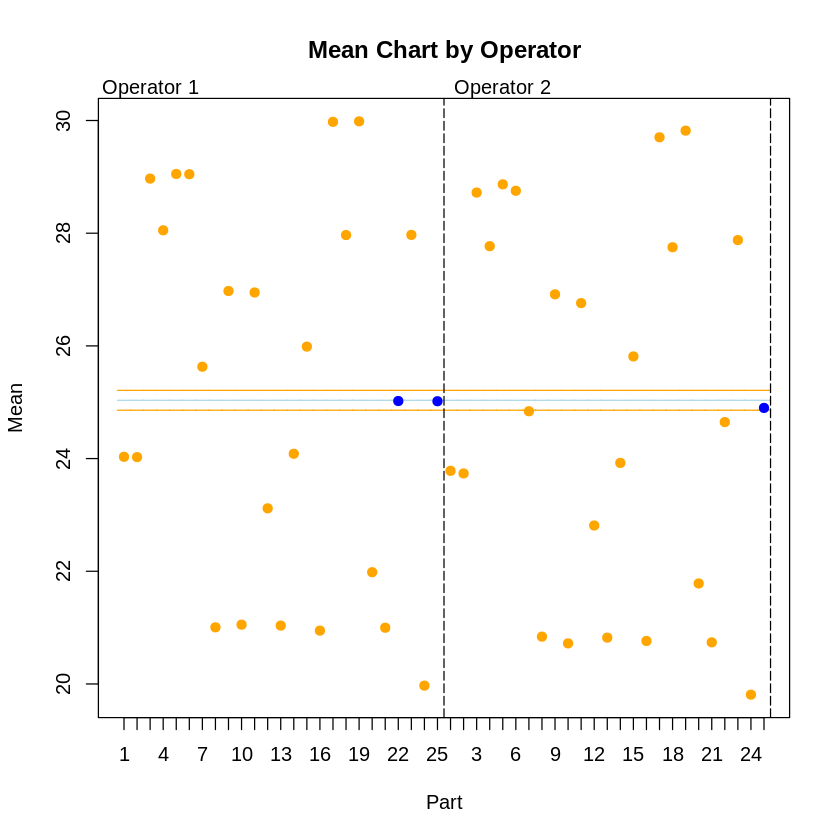

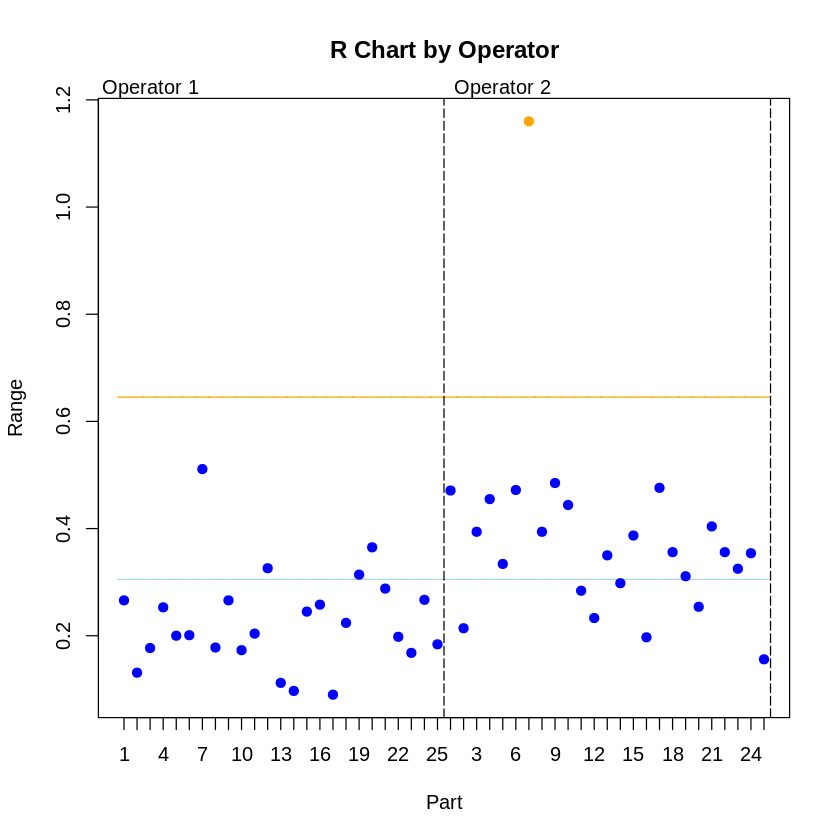

In [ ]:
# Create combined chart
spc.cc<-spc.chart.variables.mean.and.meanrange.simple(
  means = means,
  ranges = ranges,
  sample.size = 5,
  combine.charts = "separate",
  x = c(1:25, 1:25),
  chart1.main = "Mean Chart by Operator",
  chart1.xlab = "Part",
  chart2.main = "R Chart by Operator",
  chart2.xlab = "Part",
  chart1.line.col = "white",
  chart2.line.col = "white",
  chart1.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)},
  chart2.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)
 })

Remove Part 7:

In [ ]:
# Short Term MSA ----------------------------------------------------------
short <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/Continuous%20ST%20R.dat")
short <- short[, -3]
short2 <- short[which(short$Part!=7),]
# Change Part and Operator to Factors -------------------------------------
short2$Part <- factor(short2$Part)
short2$Operator <- factor(short2$Operator, labels = c("Op 1", "Op 2"))
head(short2)

,Part,Operator,Value
,<fct>,<fct>,<dbl>
1,1,Op 1,24.161
2,2,Op 1,24.104
3,3,Op 1,29.017
4,4,Op 1,28.223
5,5,Op 1,29.134
6,6,Op 1,29.136


In [ ]:
# Random Sequence Generator -----------------------------------------------
sample.int(n = 25)
# Summary - Measurement Error should be normally distributed
# for most parts --------
norm <- ro(summary.continuous(fx = Value~Part*Operator, data = short2), 4)
filtered_norm <- norm[, c("Part", "Operator", "n", "missing", "mean", "var", "adtest.p", "swtest.p")]
filtered_norm <- filtered_norm[filtered_norm$adtest.p < 0.05 | filtered_norm$swtest.p < 0.05, ]
print(filtered_norm)

[1] 21  2  7  8 10  1 20 12 25 11  5  4  6 17 23 22 16 24  3 13  9 15 14 19 18

   Part Operator n missing    mean    var adtest.p swtest.p
25   14     Op 1 5       0 24.0856 0.0023   0.0374   0.0317
30   16     Op 2 5       0 20.7628 0.0065   0.0159   0.0129


In [ ]:
# Xbar and R Chart --------------------------------------------------------
# Split Data by Operator
Op1<-short2[which(short2$Operator=="Op 1"),]
Op1<-Op1[order(Op1$Part),]

Op2<-short2[which(short2$Operator=="Op 2"),]
Op2<-Op2[order(Op2$Part),]

In [ ]:
# Extract data
op1.chart<-spc.chart.variables.mean.and.meanrange(data = Op1$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)

op2.chart<-spc.chart.variables.mean.and.meanrange(data = Op2$Value
                                                  , sample = as.numeric(Op1$Part)
                                                  , combine.charts="separate"
                                                  , chart1.display=F
                                                  , chart2.display=F)


In [ ]:
# Combine means and ranges
means <- c(op1.chart$parameter.means
         , op2.chart$parameter.means)

ranges <- c(op1.chart$parameter.ranges
          , op2.chart$parameter.ranges)

Q4: In Control

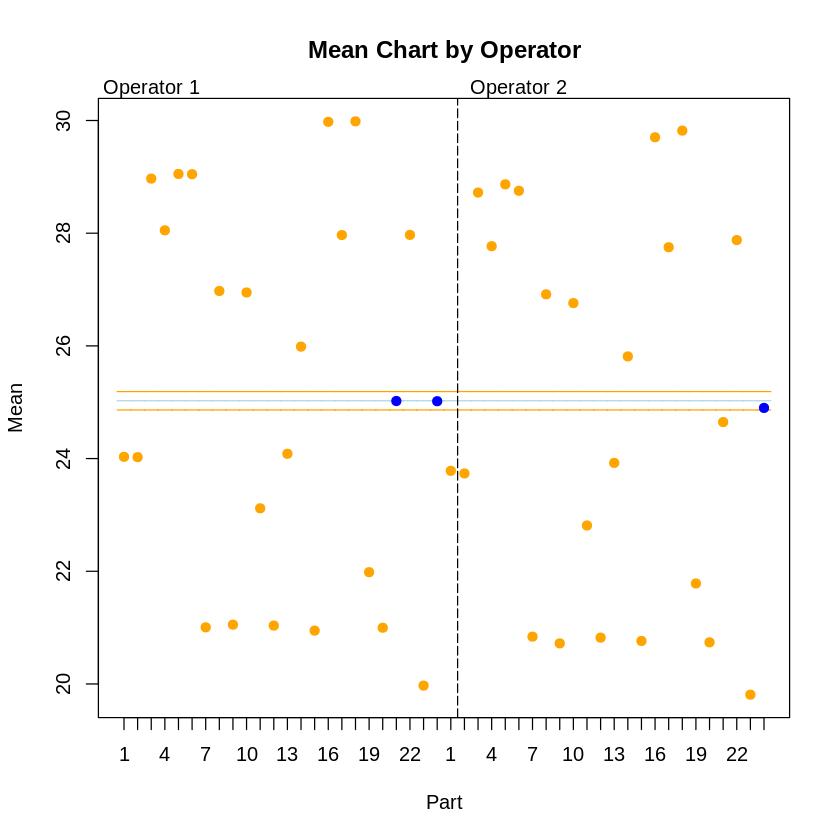

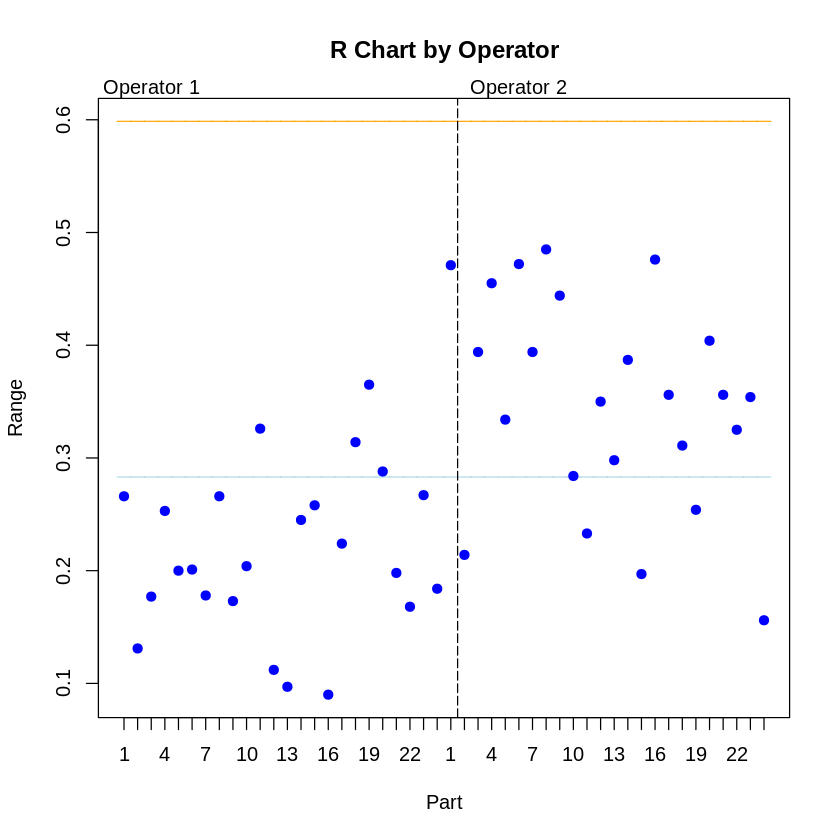

In [ ]:
# Create combined chart
spc.cc<-spc.chart.variables.mean.and.meanrange.simple(
  means = means,
  ranges = ranges,
  sample.size = 5,
  combine.charts = "separate",
  x = c(1:24, 1:24),
  chart1.main = "Mean Chart by Operator",
  chart1.xlab = "Part",
  chart2.main = "R Chart by Operator",
  chart2.xlab = "Part",
  chart1.line.col = "white",
  chart2.line.col = "white",
  chart1.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)},
  chart2.after.plot = function() {
    abline(v = c(25.5, 50.5)
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 30)
 })

In [ ]:
# Part Size Mean vs Variation (within each Operator) ----------------------
# Operator 1 --------------------------------------------------------------
op1.mean <- aggregate(
  x = Op1$Value,
  by = list(Op1$Part),
  FUN = mean)
op1.sd <- aggregate(
  x = Op1$Value,
  by = list(Op1$Part),
  FUN = sd)

op1.data <- cbind(op1.mean$x, op1.sd$x)
op1.data <- as.data.frame(op1.data)
names(op1.data) <- c("Mean", "Std_Dev")
head(op1.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,24.0312,0.12488074
2,24.0258,0.04876167
3,28.9692,0.08332287
4,28.0514,0.10540066
5,29.0516,0.08097407
6,29.0470,0.07253620


Q5: Pearson Correation for Operator 1:

In [ ]:
# Pearson Product Moment Correlation Coefficient
(r.op1 <- round(cor(x = op1.data$Mean
                    , y = op1.data$Std_Dev), 4))

[1] -0.1567

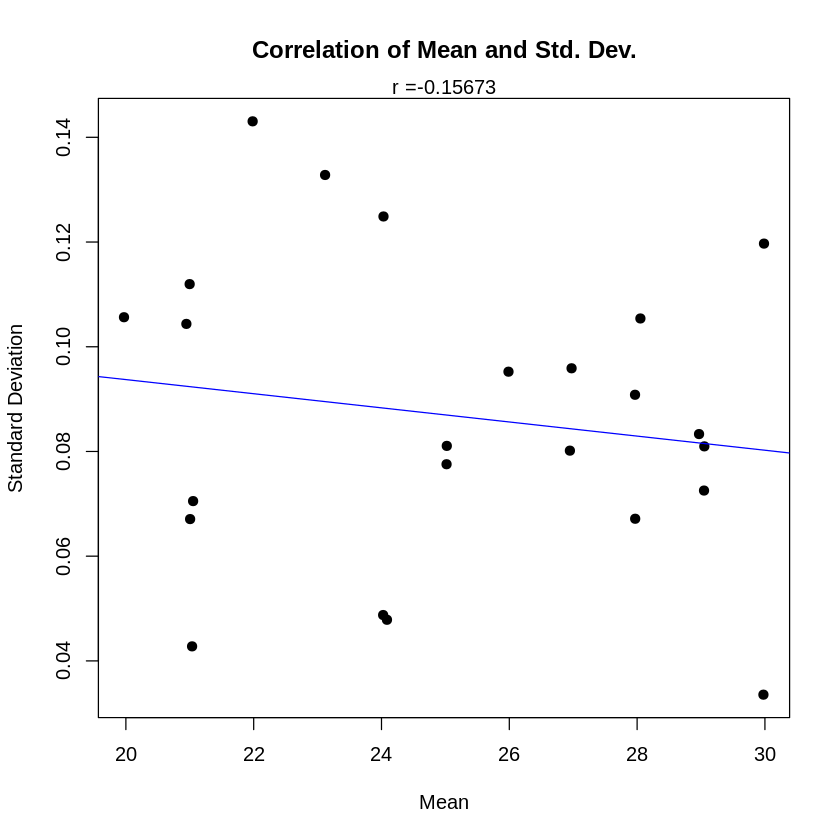

In [ ]:
# Scatterplot of Mean vs Standard deviation
plot(
  x = op1.data$Mean,
  y = op1.data$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev.")
abline(lm(Std_Dev ~ Mean, data = op1.data), col = "blue")
mtext(bquote(paste("r =", .(r.op1), side = 3)))

Q6: Pearson Correation for Operator 1 Test:

In [ ]:
# Test to see if r is different from zero
cor.pearson.r.onesample(x = op1.data$Mean
                       ,y = op1.data$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = -0.74415, null hypothesis correlation = 0, p-value =
0.4647
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5267867  0.2633437
sample estimates:
   sample.r          df sample.size   r.squared z_r.lowerci         z_r 
-0.15669385 22.00000000 24.00000000  0.02455296 -0.58569472 -0.15799551 
z_r.upperci       power 
 0.26970369  0.10824088 


In [ ]:
# Operator 2 --------------------------------------------------------------
op2.mean <- aggregate(
  x = Op2$Value,
  by = list(Op2$Part),
  FUN = mean)
op2.sd <- aggregate(
  x = Op2$Value,
  by = list(Op2$Part),
  FUN = sd)

op2.data <- cbind(op2.mean$x, op2.sd$x)
op2.data <- as.data.frame(op2.data)
names(op2.data) <- c("Mean", "Std_Dev")
head(op2.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,23.7828,0.19969652
2,23.7360,0.07878134
3,28.7214,0.17226520
4,27.7700,0.18477960
5,28.8672,0.13055152
6,28.7530,0.19743986


Q7: Pearson Correation for Operator 2:

In [ ]:
# Pearson Product Moment Correlation Coefficient
(r.op2<-round(cor(x = op2.data$Mean
                 ,y = op2.data$Std_Dev),4))

[1] 0.2249

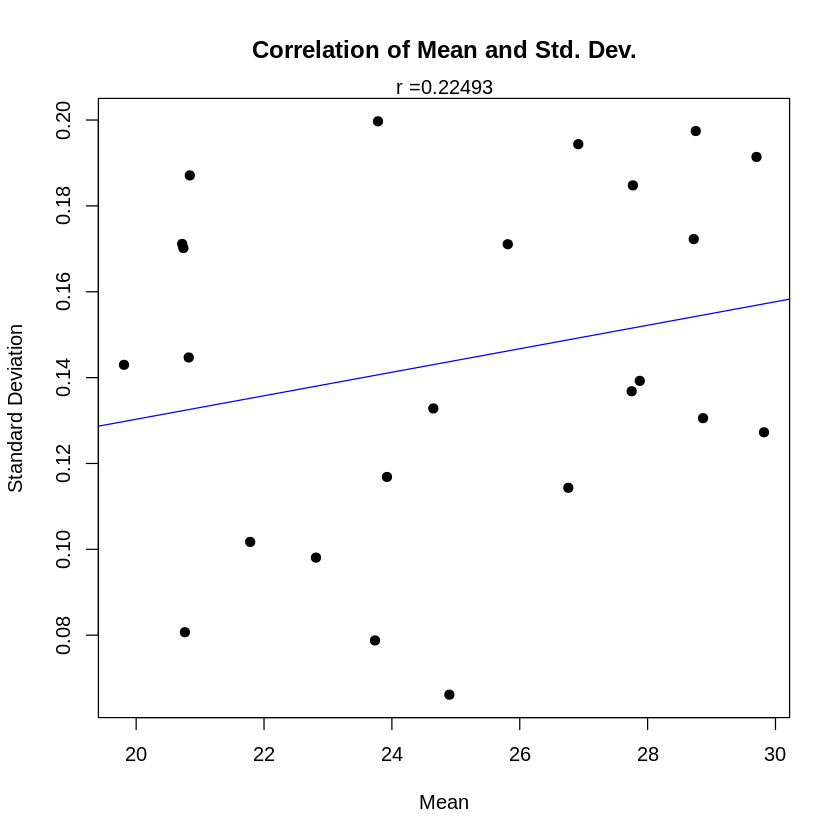

In [ ]:
# Scatterplot of Mean vs Standard deviation
plot(
  x = op2.data$Mean,
  y = op2.data$Std_Dev,
  pch = 19,
  xlab = "Mean",
  ylab = "Standard Deviation",
  main = "Correlation of Mean and Std. Dev.")
abline(lm(Std_Dev ~ Mean, data = op2.data), col = "blue")
mtext(bquote(paste("r =", .(r.op2), side = 3)))

Q8: Pearson Correation for Operator 2 Test:

In [ ]:
# See if r is significantly different than zero
cor.pearson.r.onesample(x = op2.data$Mean
                       ,y = op2.data$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = 1.0826, null hypothesis correlation = 0, p-value = 0.2907
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1962932  0.5760376
sample estimates:
   sample.r          df sample.size   r.squared z_r.lowerci         z_r 
 0.22490806 22.00000000 24.00000000  0.05058364 -0.19887950  0.22881971 
z_r.upperci       power 
 0.65651891  0.18104750 


Q9: Significant Factors in ANOVA

In [ ]:
# Short Term MSA ANOVA ----------------------------------------------------
short2.out <-ro(
    msa.continuous.repeatability.reproducibility(
      measurement = short2$Value,
      part        = short2$Part,
      appraiser   = short2$Operator,
      stat.lsl    = 21.5,
      stat.usl    = 28.5),5)

(anova.st.out <- data.frame(short2.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,23,2541.56479,110.50282,7548.49393,0.00000
appraiser,1,2.80520,2.80520,191.62405,0.00000
part:appraiser,23,0.33670,0.01464,0.95812,0.52146
Repeatability,192,2.93356,0.01528,NA,NA
Total,239,2547.64024,NA,NA,NA


Q10: Largest Component of Vriance<br>
Q11: Smallest Component of Vriance

In [ ]:
# Components of Variance --------------------------------------------------
(comp.st.var <- data.frame(short2.out$ev.full))
comp.var.st.out <- comp.st.var[1:2]
# Add rownames to Variance Component Table
comp.var.st.out$Source <- rownames(comp.var.st.out)
comp.var.st.out <- comp.var.st.out[c(3,1,2)]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.03853,0.35,0.19630,1.17780,5.90,16.83
Repeatability,0.01528,0.14,0.12361,0.74165,3.71,10.59
Reproducibility,0.02325,0.21,0.15249,0.91497,4.58,13.07
Appraiser,0.02325,0.21,0.15249,0.91497,4.58,13.07
Part:Appraiser,0.00000,0.00,0.00000,0.00000,0.00,0.00
Part-To-Part,11.04882,99.65,3.32398,19.94386,99.83,284.91
Total Variation,11.08735,100.00,3.32977,19.97860,100.00,285.41


Q12: Percent of Contribution<br>
Q13: Percent of Contribution<br>
Q14: pct_cont < 1%, acceptable<br>
Q15: Percent of Tolerance<br>
Q16: pct_Tolerance 10%~30%, may be acceptable

In [ ]:
# Study Variation ---------------------------------------------------------
ro(study.st.var <- data.frame(short2.out$ev.full), 4)
study.var.st.out <- study.st.var[3:6]
# Add rownames to Study Variation Table
study.var.st.out$Source<-rownames(study.var.st.out)
study.var.st.out<-study.var.st.out[c(5,1,2,3,4)]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.0385,0.35,0.1963,1.1778,5.90,16.83
Repeatability,0.0153,0.14,0.1236,0.7416,3.71,10.59
Reproducibility,0.0232,0.21,0.1525,0.9150,4.58,13.07
Appraiser,0.0232,0.21,0.1525,0.9150,4.58,13.07
Part:Appraiser,0.0000,0.00,0.0000,0.0000,0.00,0.00
Part-To-Part,11.0488,99.65,3.3240,19.9439,99.83,284.91
Total Variation,11.0874,100.00,3.3298,19.9786,100.00,285.41


Q17: NDC<br>
Q18: NDC > 10: acceptable

In [ ]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
short2.out$ev.reduced.number.distinct.categories

[1] 23

In [ ]:
# Discrimination Ratio
short2.out$ev.reduced.discrimination.ratio

[1] 23.99069

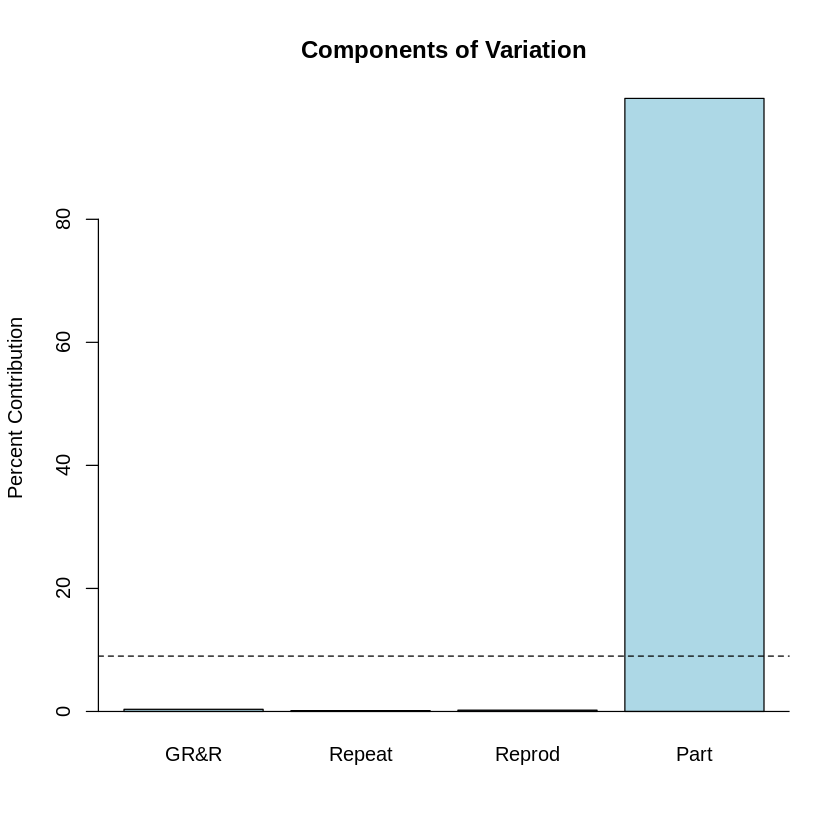

In [ ]:
# Data Visualization ------------------------------------------------------
# Barplot - Components of Variance ----------------------------------------

# Subset data for barplot
bp.compvar<-comp.var.st.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")

abline(h=0)
abline(h=9, lty=2)

Q19:

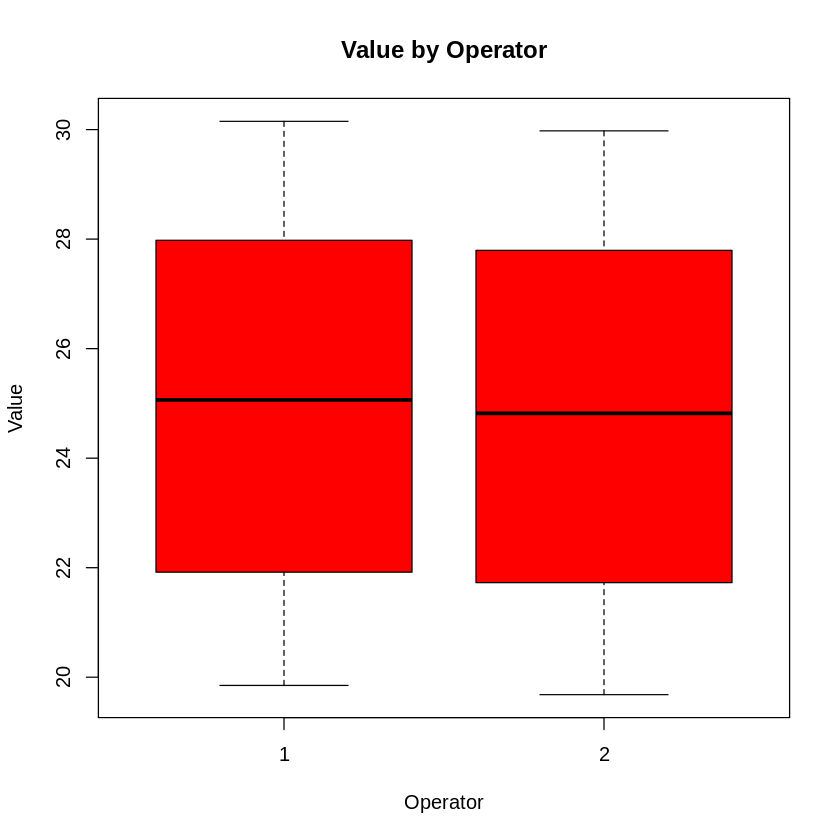

In [ ]:
# Boxplot - Value by Operator ---------------------------------------------
boxplot(Value ~ Operator,
        data = short,
        col = "red",
        main = "Value by Operator")

Q20:

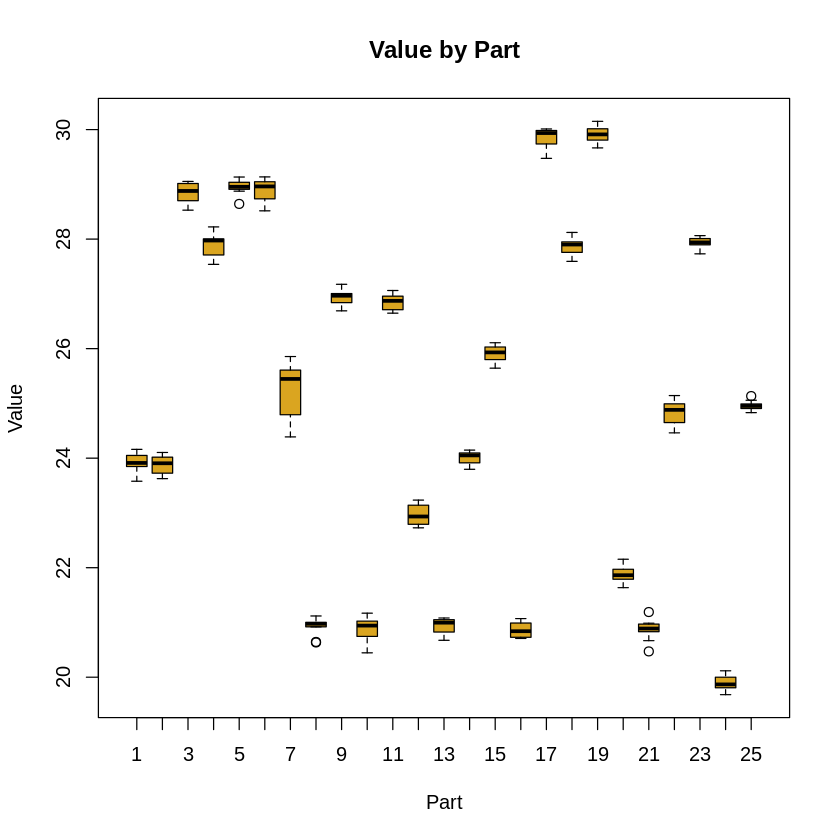

In [ ]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = short,
        col = "goldenrod",
        main = "Value by Part")

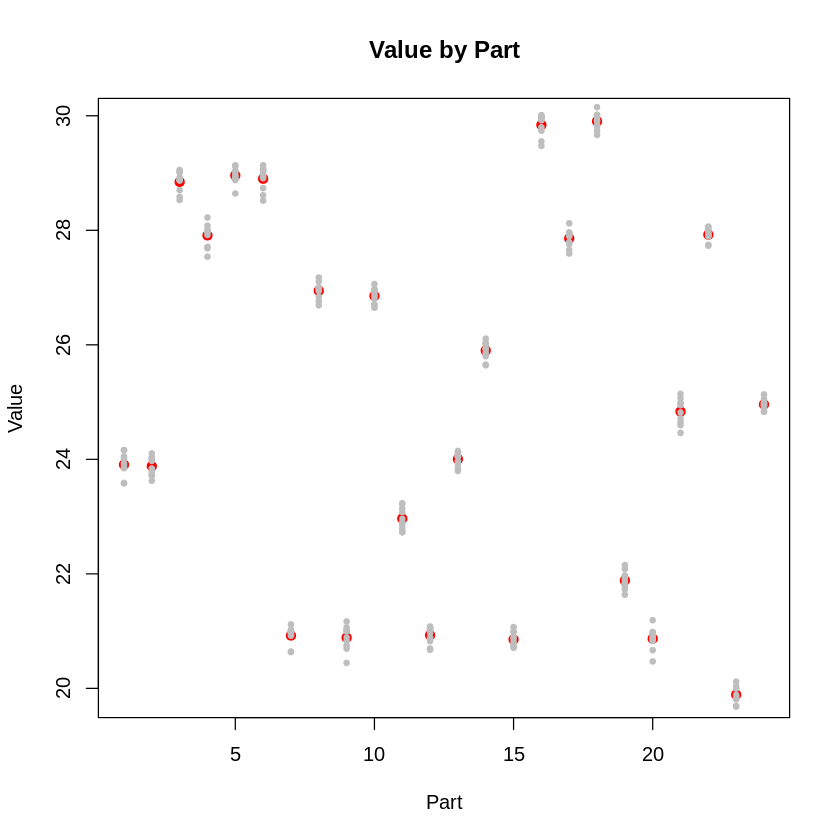

In [ ]:
# Line / Point Chart - Value by Part --------------------------------------
lc <-aggregate(short2$Value
               ,by = list(as.numeric(short2$Part))
               ,FUN = mean)

plot(
  x = lc$x,
  type = "p",
  pch = 19,
  col = "red",
  main = "Value by Part",
  xlab = "Part",
  ylab = "Value"
)
points(
  x   = short2$Part,
  y   = short2$Value,
  pch = 19,
  col = " grey",
  cex = 0.6,
  bty = "n"
)

Q21:

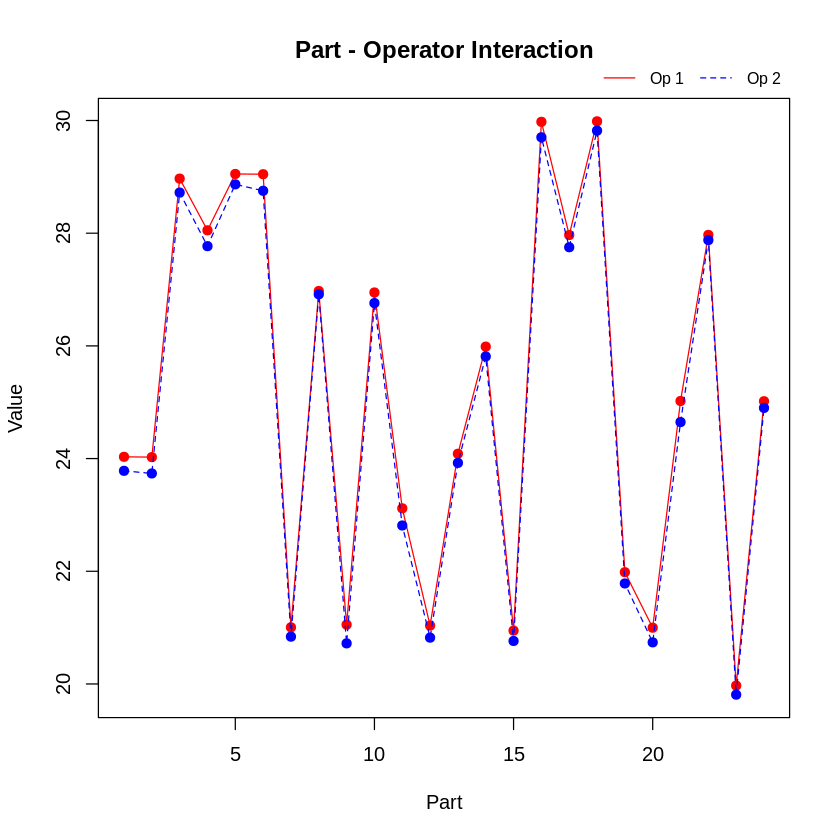

In [ ]:
# Part Operator Interaction -----------------------------------------------
plot(op1.chart$parameter.means,
     type = "o",
     pch = 19,
     col = "red",
     xlab = "Part",
     ylab = "Value"  ,
     main = "Part - Operator Interaction",
     ylim = c(min(op1.chart$parameter.means, op2.chart$parameter.means),
              max(op1.chart$parameter.means, op2.chart$parameter.means)))
lines(
  op2.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "blue",
  lty = 2)
legend("bottomright",inset = c(0, 1),
       xpd = TRUE,
       legend = c("Op 1", "Op 2"),
       col = c("red", "blue","forest green"),
       horiz = T,
       lty = 1:2,
       cex = 0.8,
       bty = "n")

<table width=1400><td bgcolor="#d5695d"><font color="white" size="6"><b>
Quiz Part2
</b></font></td></table>

In [ ]:
# Long Term MSA -----------------------------------------------------------
Longterm.MSA <- read.table("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/Continuous%20LT%20R.dat", header = TRUE)
colnames(Longterm.MSA) <- c("Rep", "Part", "Value")
long <- Longterm.MSA
long$Part <- factor(lt$Part)
long$Operator <- rep(1, each=200)
long$Operator <- factor(lt$Operator, labels = "Operator 1")
head(long)

,Rep,Part,Value,Operator
,<int>,<fct>,<dbl>,<fct>
1,1,1,24.76,Operator 1
2,1,2,25.81,Operator 1
3,1,3,24.05,Operator 1
4,1,4,23.73,Operator 1
5,1,5,24.89,Operator 1
6,1,6,24.74,Operator 1


In [ ]:
# Summary - Measurement Error should be normally distributed
# for most parts --------
norm <- ro(summary.continuous(fx = Value ~ Part, data = long), 4)
norm

,Part,n,missing,mean,var,g3.skewness,g3test.p,g4.kurtosis,g4test.p
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,25,0,24.7560,0.0266,0.3921,0.3762,-0.7299,0.3774
2,2,25,0,25.9704,0.0198,0.7618,0.0980,0.5934,0.3945
3,3,25,0,24.1648,0.0200,-0.5862,0.1938,1.1285,0.1997
4,4,25,0,23.9564,0.0165,0.0665,0.8789,-0.2931,0.8793
5,5,25,0,24.9608,0.0175,-0.3240,0.4624,-0.4334,0.7167
6,6,25,0,24.9292,0.0178,0.4835,0.2788,-0.7982,0.3076
7,7,25,0,24.8480,0.0206,0.3981,0.3692,-0.1046,0.9173
8,8,25,0,24.3692,0.0216,0.2472,0.5734,-0.9732,0.1582


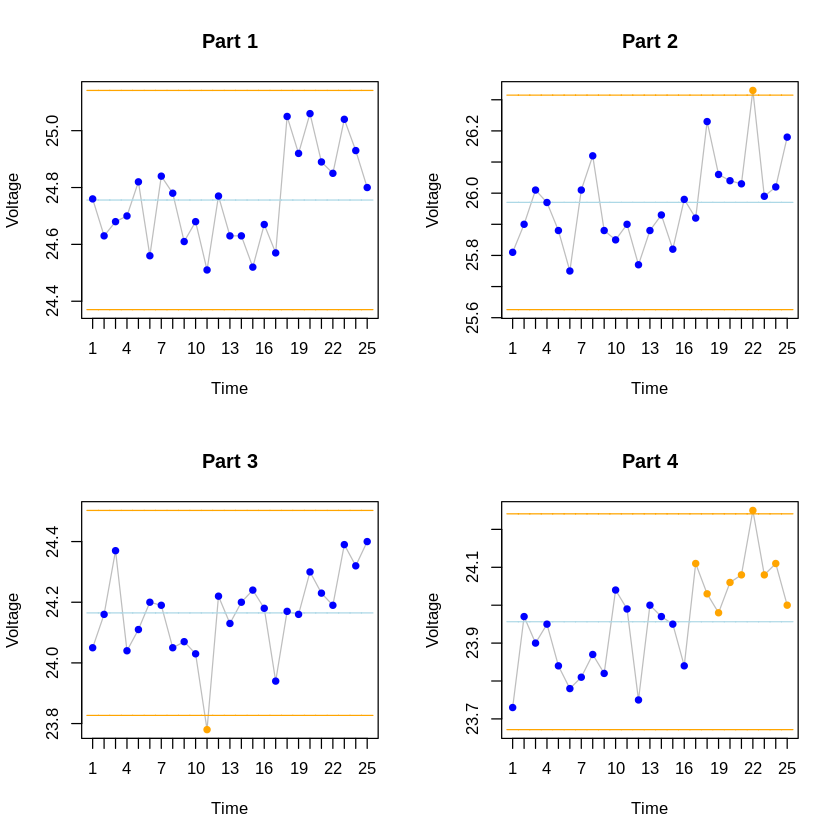

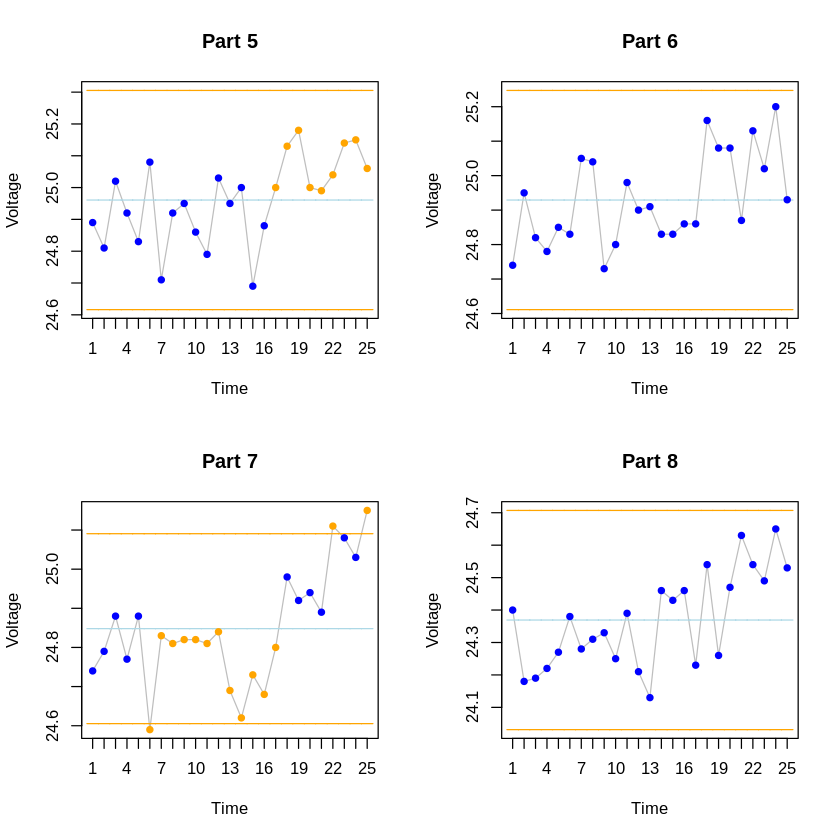

In [ ]:
# Control Charts by Part --------------------------------------------------
rules<-spc.rulesets.nelson.1984.test.1.2.3.4()
rules$alternating<-NULL

par(mfrow=c(2,2))

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 1],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 1",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 2],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 2",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 3],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 3",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 4],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 4",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 5],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 5",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 6],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 6",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 7],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 7",
  chart2.display = F)

spc.chart.variables.individual.and.movingrange.generic.simple(
  individuals = long$Value[long$Part == 8],
  combine.charts = "leave.par.alone",
  chart1.control.rules = rules,
  chart1.ylab = "Voltage",
  chart1.main = "Part 8",
  chart2.display = F)

graphics.off()

In [ ]:
# Calculate Mean and Standard Deviations by Repetition ----------------------------------
long.mean <- aggregate(long$Value, by = list(long$Rep), FUN=mean)
long.sd <- aggregate(long$Value, by = list(long$Rep), FUN=sd)
# Create Data Frame
long.data <- cbind(long.mean$x, long.sd$x)
long.data <- as.data.frame(long.data)
names(long.data) <- c("Mean", "Std_Dev")
head(long.data)

,Mean,Std_Dev
,<dbl>,<dbl>
1,24.64000,0.6210130
2,24.67375,0.6114371
3,24.73375,0.6398200
4,24.66875,0.6429050
5,24.68500,0.6267148
6,24.64625,0.5941606


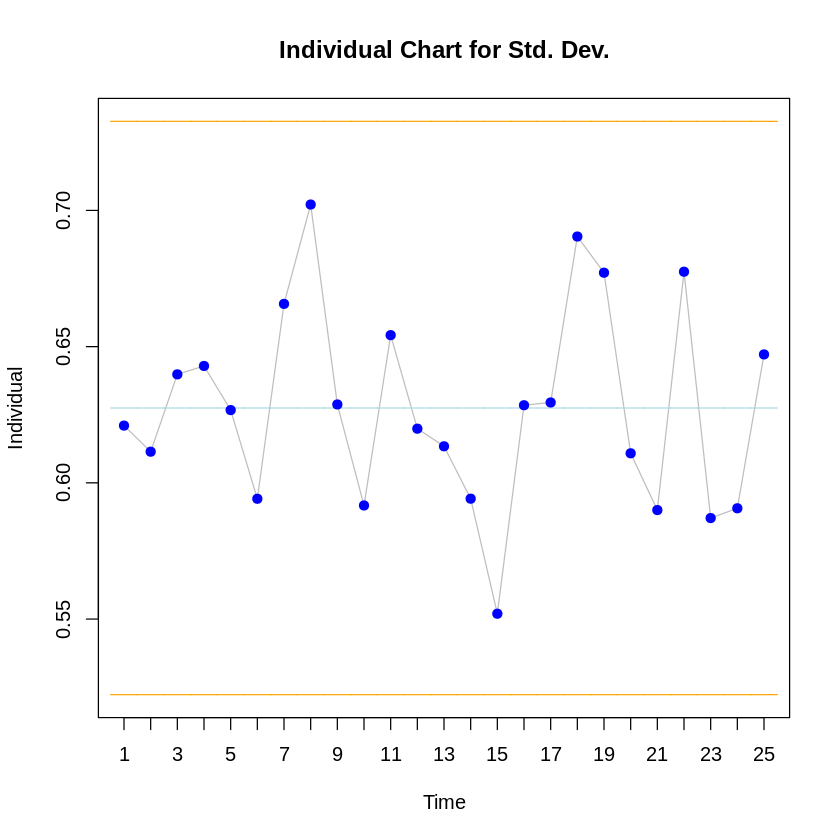

In [ ]:
# Individuals Chart for Standard Deviation --------------------------------
spc.chart.variables.individual.and.movingrange.normal.simple(
  individuals = long.data$Std_Dev,
  chart2.display = F,
  chart1.main = "Individual Chart for Std. Dev.")

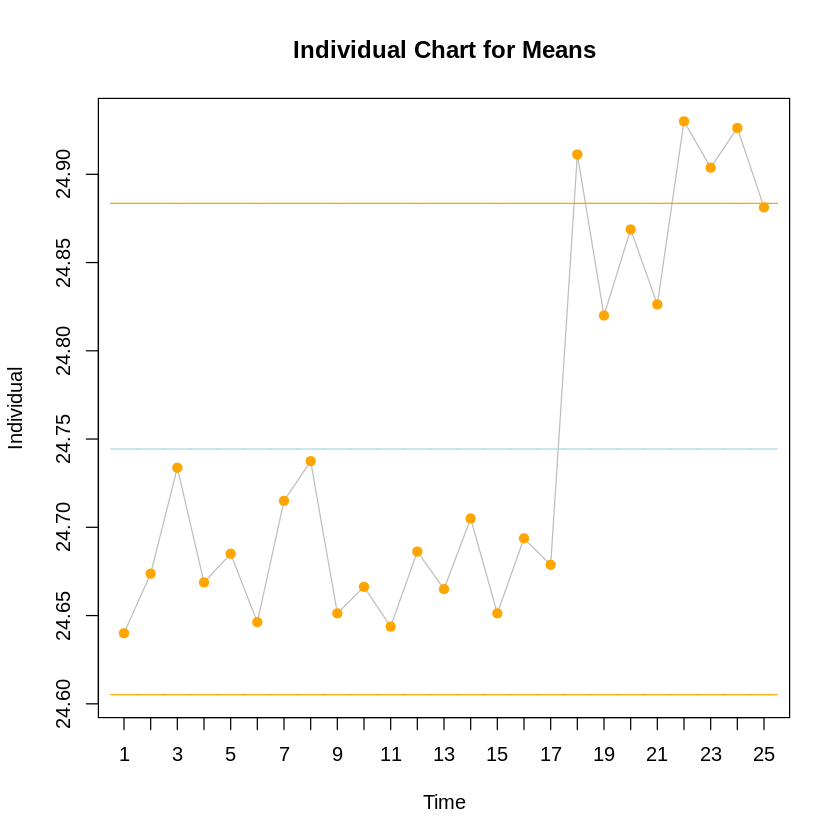

In [ ]:
# Individuals Chart for Means ---------------------------------------------
spc.chart.variables.individual.and.movingrange.normal.simple(
  individuals = long.data$Mean,
  chart2.display =  F,
  chart1.main = "Individual Chart for Means")

In [ ]:
# Part Size Mean vs Variation ----------------------
long.part.mean <-aggregate(
     x = long$Value,
     by = list(long$Part),
     FUN = mean)
long.part.sd <- aggregate(
  x = long$Value,
  by = list(long$Part),
  FUN = sd)
long.data.part <- cbind(long.part.mean$x, long.part.sd$x)
long.data.part <- as.data.frame(long.data.part)
names(long.data.part) <- c("Mean", "Std_Dev")
head(long.data.part)

,Mean,Std_Dev
,<dbl>,<dbl>
1,24.7560,0.1629928
2,25.9704,0.1407859
3,24.1648,0.1413365
4,23.9564,0.1284160
5,24.9608,0.1321590
6,24.9292,0.1333829


In [ ]:
# Pearson Product Moment Correlation Coefficient --------------------------
(r.long <- ro(cor(x = long.data.part$Mean
              , y = long.data.part$Std_Dev), 4))

[1] 0.0941

In [ ]:
# See if r is significantly different than zero
cor.pearson.r.onesample(x = long.data.part$Mean
                      , y = long.data.part$Std_Dev)


	One-Sample Test for Pearson Product Moment Correlation

data:  sample r and sample size
t.statistic = 0.23144, null hypothesis correlation = 0, p-value =
0.8247
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6539614  0.7491039
sample estimates:
    sample.r           df  sample.size    r.squared  z_r.lowerci          z_r 
 0.094066877  6.000000000  8.000000000  0.008848577 -0.782176729  0.094345812 
 z_r.upperci        power 
 0.970868352  0.040145481 


In [ ]:
# Long Term MSA ANOVA ----------------------------------------------------
long.out <-
  ro(msa.continuous.repeatability.reproducibility(
      measurement = long$Value,
      part = long$Part,
      appraiser = long$Operator,
      stat.lsl = 21.5,
      stat.usl = 28.5),5)

(anova.long.out <- data.frame(long.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,7,67.31447,9.61635,479.7123,0
Repeatability,192,3.84885,0.02005,NA,NA
3,199,71.16332,NA,NA,NA


In [ ]:
# Components of Variance --------------------------------------------------
# Study Variation ---------------------------------------------------------
ro(comp.long.var<-data.frame(long.out$ev.full), 4)
comp.var.long.out <- comp.long.var[1:2]

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.0200,4.96,0.1416,0.8495,22.28,12.14
Repeatability,0.0200,4.96,0.1416,0.8495,22.28,12.14
Reproducibility,NA,NA,NA,NA,NA,NA
Appraiser,NA,NA,NA,NA,NA,NA
Part:Appraiser,NA,NA,NA,NA,NA,NA
Part-To-Part,0.3839,95.04,0.6196,3.7174,97.49,53.10
Total Variation,0.4039,100.00,0.6355,3.8132,100.00,54.47


In [ ]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
long.out$ev.reduced.number.distinct.categories

# Discrimination Ratio
long.out$ev.reduced.discrimination.ratio


[1] 6

[1] 6.26873

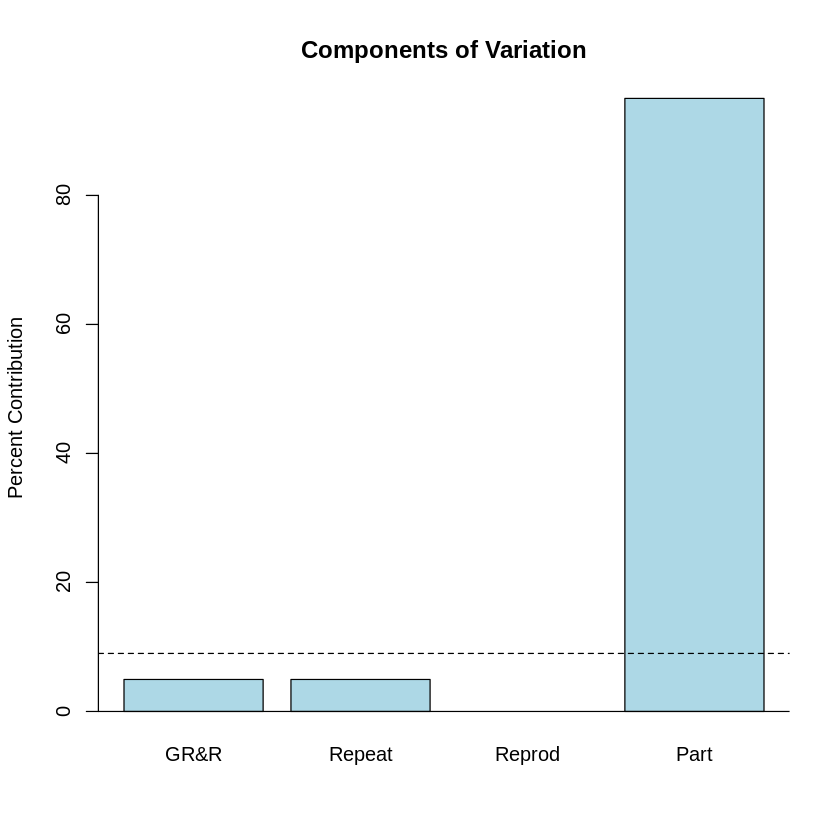

In [ ]:
# Data Visualization ------------------------------------------------------
# Barplot - Components of Variance ----------------------------------------

# Subset data for barplot
bp.compvar<-comp.var.long.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")

abline(h=0)
abline(h=9, lty=2)

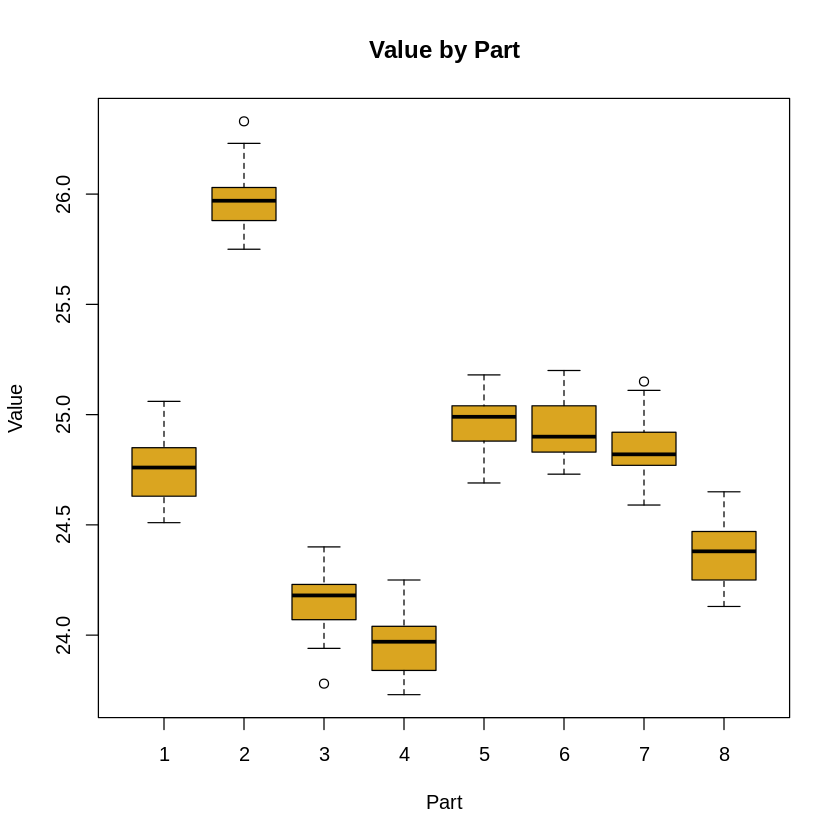

In [ ]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = long,
        col = "goldenrod",
        main = "Value by Part")